In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

In [2]:
df = pd.read_csv("Sample - Superstore.csv", encoding="cp1252")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [6]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

## Superstore Data Analysis

### Top-Selling & Most Profitable Categories/Sub-Categories

In [7]:
top_selling_categories = (
    df.groupby("Category")[["Sales", "Profit"]].sum()
    .sort_values(by="Sales", ascending=False)
    .reset_index()
)
top_selling_categories["Profit Margin (%)"] = (top_selling_categories["Profit"] / top_selling_categories["Sales"]) * 100
top_selling_categories = top_selling_categories.round(2)
top_selling_categories

,Category,Sales,Profit,Profit Margin (%)
0,Technology,836154.03,145454.95,17.40
1,Furniture,741999.80,18451.27,2.49
2,Office Supplies,719047.03,122490.80,17.04


##### Category: Dual-Axis Bar = `Sales` and Line = `Profit` Plot

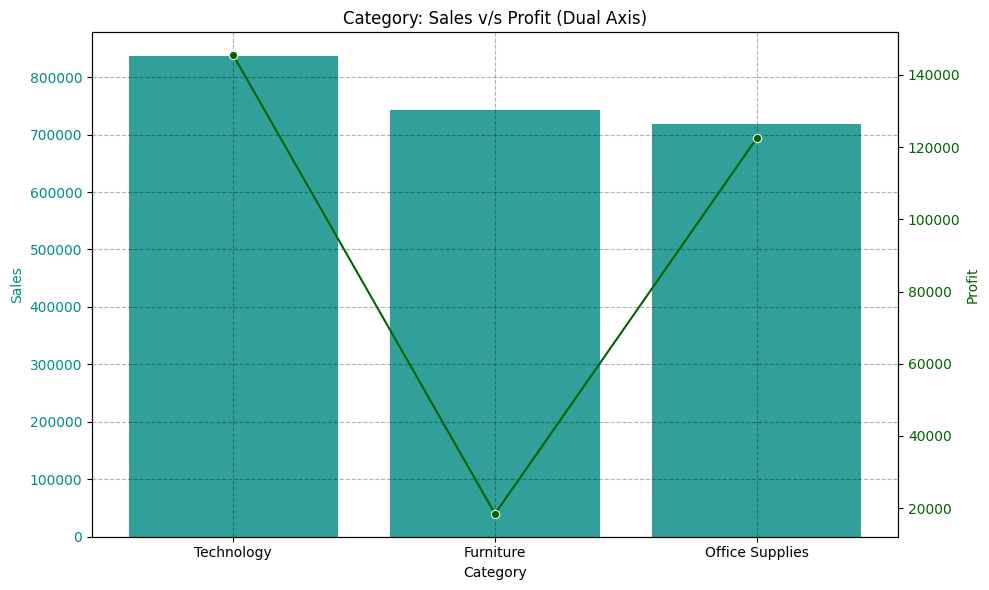

In [8]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar for Sales
sns.barplot(data=top_selling_categories, x="Category", y="Sales", ax=ax1, color="lightseagreen")
ax1.set_ylabel("Sales", color="darkcyan")
ax1.tick_params(axis="y", labelcolor="darkcyan")
ax1.grid(linestyle="--", color="black", alpha=0.3)

# Line for Profit
ax2 = ax1.twinx()
sns.lineplot(data=top_selling_categories, x="Category", y="Profit", ax=ax2, color="darkgreen", marker="o")
ax2.set_ylabel("Profit", color="darkgreen")
ax2.tick_params(axis="y", labelcolor="darkgreen")

plt.title("Category: Sales v/s Profit (Dual Axis)")
plt.tight_layout()
plt.show()

In [9]:
top_selling_subcategories = (
    df.groupby("Sub-Category")[["Sales", "Profit"]].sum()
    .sort_values(by="Sales", ascending=False)
    .reset_index()
)
top_selling_subcategories["Profit Margin (%)"] = (top_selling_subcategories["Profit"] / top_selling_subcategories["Sales"]) * 100
top_selling_subcategories = top_selling_subcategories.round(2)
top_selling_subcategories

,Sub-Category,Sales,Profit,Profit Margin (%)
0,Phones,330007.05,44515.73,13.49
1,Chairs,328449.10,26590.17,8.10
2,Storage,223843.61,21278.83,9.51
3,Tables,206965.53,-17725.48,-8.56
4,Binders,203412.73,30221.76,14.86
5,Machines,189238.63,3384.76,1.79
6,Accessories,167380.32,41936.64,25.05
7,Copiers,149528.03,55617.82,37.20
8,Bookcases,114880.00,-3472.56,-3.02
9,Appliances,107532.16,18138.01,16.87


##### Subcategory: Dual-Axis Bar = `Sales` and Line = `Profit` Plot

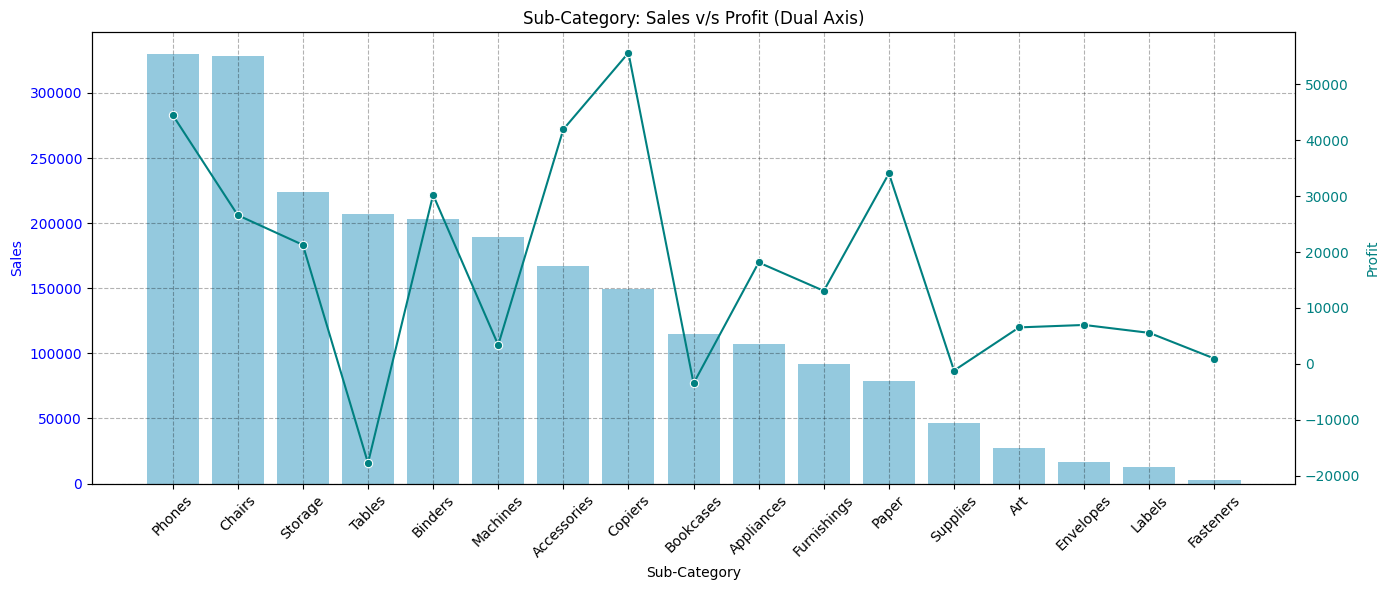

In [10]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar for Sales
sns.barplot(data=top_selling_subcategories, x="Sub-Category", y="Sales", ax=ax1, color="skyblue")
ax1.set_ylabel("Sales", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_xticklabels(top_selling_subcategories["Sub-Category"], rotation=45)
ax1.grid(linestyle="--", color="black", alpha=0.3)

# Line for Profit
ax2 = ax1.twinx()
sns.lineplot(data=top_selling_subcategories, x="Sub-Category", y="Profit", ax=ax2, color="teal", marker="o")
ax2.set_ylabel("Profit", color="teal")
ax2.tick_params(axis="y", labelcolor="teal")

plt.title("Sub-Category: Sales v/s Profit (Dual Axis)")
plt.tight_layout()
plt.show()

### Region-wise and State-wise Profitability

##### Region-Wise Profitability

In [11]:
region_wise_profit = df.groupby(["Region"])[["Sales", "Profit"]].sum().sort_values(by="Profit", ascending=False).reset_index()
region_wise_profit["Profit Margin (%)"] = (region_wise_profit["Profit"] / region_wise_profit["Sales"]) * 100
region_wise_profit = region_wise_profit.round(2)
region_wise_profit

,Region,Sales,Profit,Profit Margin (%)
0,West,725457.82,108418.45,14.94
1,East,678781.24,91522.78,13.48
2,South,391721.90,46749.43,11.93
3,Central,501239.89,39706.36,7.92


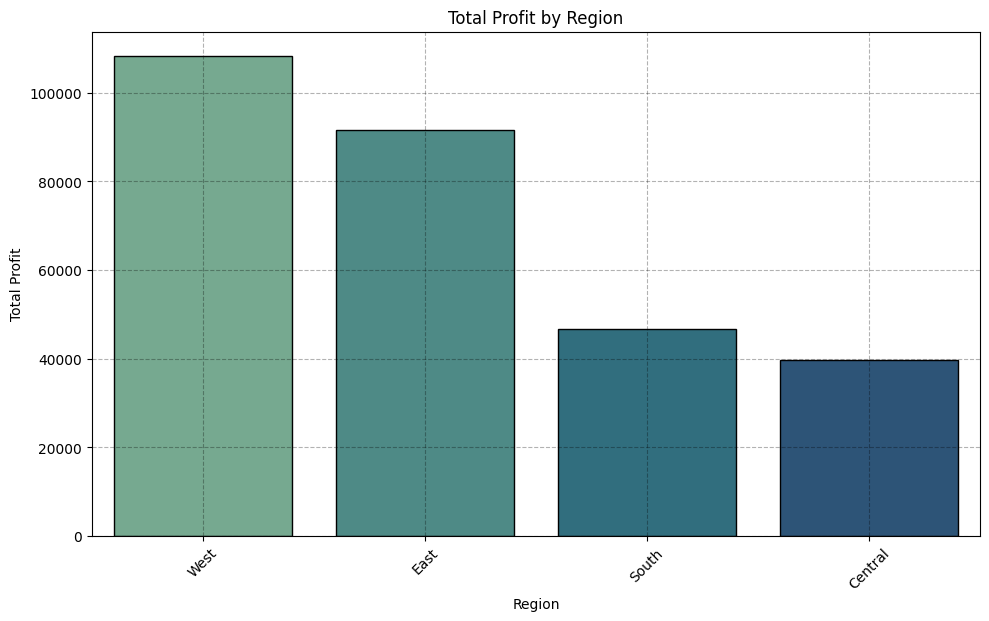

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=region_wise_profit, x="Region", y="Profit", palette="crest", edgecolor="black")
plt.title("Total Profit by Region")
plt.xlabel("Region")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid(linestyle="--", color="black", alpha=0.3)

plt.show()

##### State-Wise Profitability

In [13]:
state_wise_profit = df.groupby(["State"])[["Sales", "Profit"]].sum().sort_values(by="Profit", ascending=False).reset_index()
state_wise_profit["Profit Margin (%)"] = (state_wise_profit["Profit"] / state_wise_profit["Sales"]) * 100
state_wise_profit = state_wise_profit.round(2)
state_wise_profit

,State,Sales,Profit,Profit Margin (%)
0,California,457687.63,76381.39,16.69
1,New York,310876.27,74038.55,23.82
2,Washington,138641.27,33402.65,24.09
3,Michigan,76269.61,24463.19,32.07
4,Virginia,70636.72,18597.95,26.33
5,Indiana,53555.36,18382.94,34.33
6,Georgia,49095.84,16250.04,33.10
7,Kentucky,36591.75,11199.70,30.61
8,Minnesota,29863.15,10823.19,36.24
9,Delaware,27451.07,9977.37,36.35


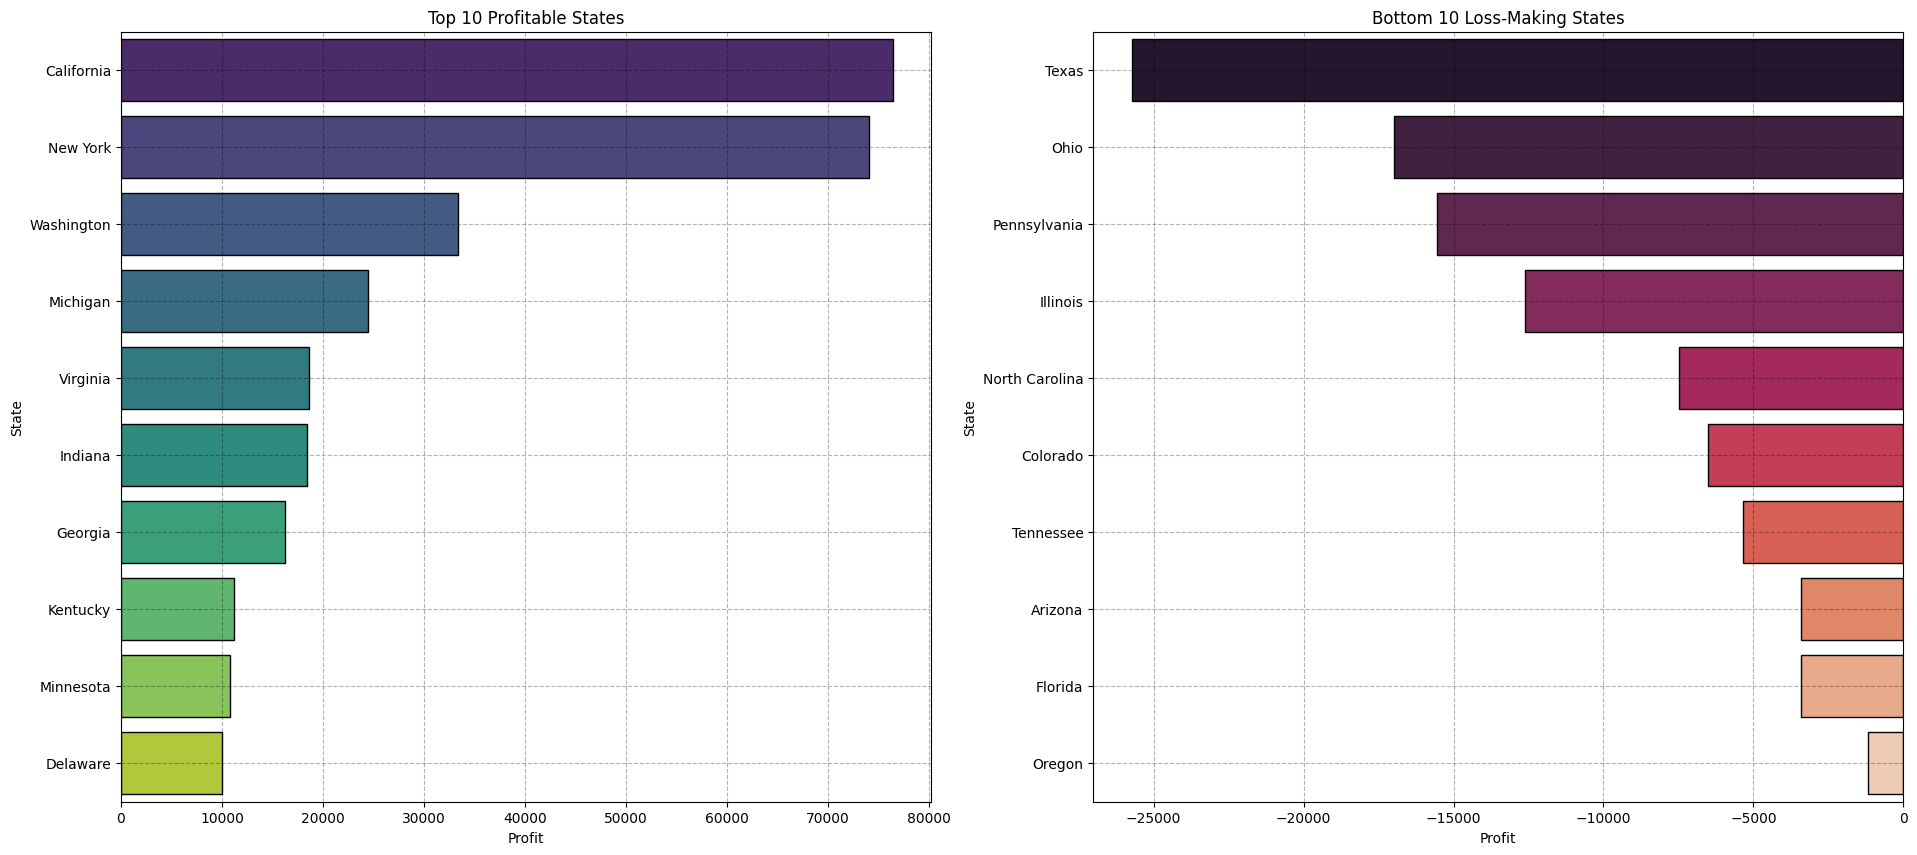

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(23, 10))

sns.barplot(data=state_wise_profit.head(10), x="Profit", y="State", palette="viridis", ax=ax[0], edgecolor="black")
ax[0].set_title("Top 10 Profitable States")
ax[0].set_xlabel("Profit")
ax[0].set_ylabel("State")
ax[0].grid(linestyle="--", color="black", alpha=0.3)

sns.barplot(data=state_wise_profit.tail(10).sort_values(by="Profit"), x="Profit", y="State", palette="rocket", ax=ax[1], edgecolor="black")
ax[1].set_title("Bottom 10 Loss-Making States")
ax[1].set_xlabel("Profit")
ax[1].set_ylabel("State")
ax[1].grid(linestyle="--", color="black", alpha=0.3)

plt.show()

### Monthly Trends of Sales and Profit

In [15]:
df["Year_Month"] = df["Order Date"].dt.to_period("M")

monthly_trends = df.groupby(["Year_Month"])[["Sales", "Profit"]].sum().sort_index()
monthly_trends.index = monthly_trends.index.astype(str)
monthly_trends["Profit Margin (%)"] = (monthly_trends["Profit"] / monthly_trends["Sales"]) * 100
monthly_trends = monthly_trends.round(2)
monthly_trends

,Sales,Profit,Profit Margin (%)
Year_Month,,,
2014-01,14236.90,2450.19,17.21
2014-02,4519.89,862.31,19.08
2014-03,55691.01,498.73,0.90
2014-04,28295.34,3488.84,12.33
2014-05,23648.29,2738.71,11.58
2014-06,34595.13,4976.52,14.39
2014-07,33946.39,-841.48,-2.48
2014-08,27909.47,5318.10,19.05
2014-09,81777.35,8328.10,10.18


##### Highest Sales and Profits

In [16]:
monthly_trends.sort_values(by="Profit", ascending=False).head()

,Sales,Profit,Profit Margin (%)
Year_Month,,,
2016-12,96999.04,17885.31,18.44
2016-10,59687.74,16243.14,27.21
2017-03,58872.35,14751.89,25.06
2015-11,75972.56,12474.79,16.42
2017-09,87866.65,10991.56,12.51


In [17]:
monthly_trends.sort_values(by="Sales", ascending=False).head()

,Sales,Profit,Profit Margin (%)
Year_Month,,,
2017-11,118447.82,9690.10,8.18
2016-12,96999.04,17885.31,18.44
2017-09,87866.65,10991.56,12.51
2017-12,83829.32,8483.35,10.12
2014-09,81777.35,8328.10,10.18


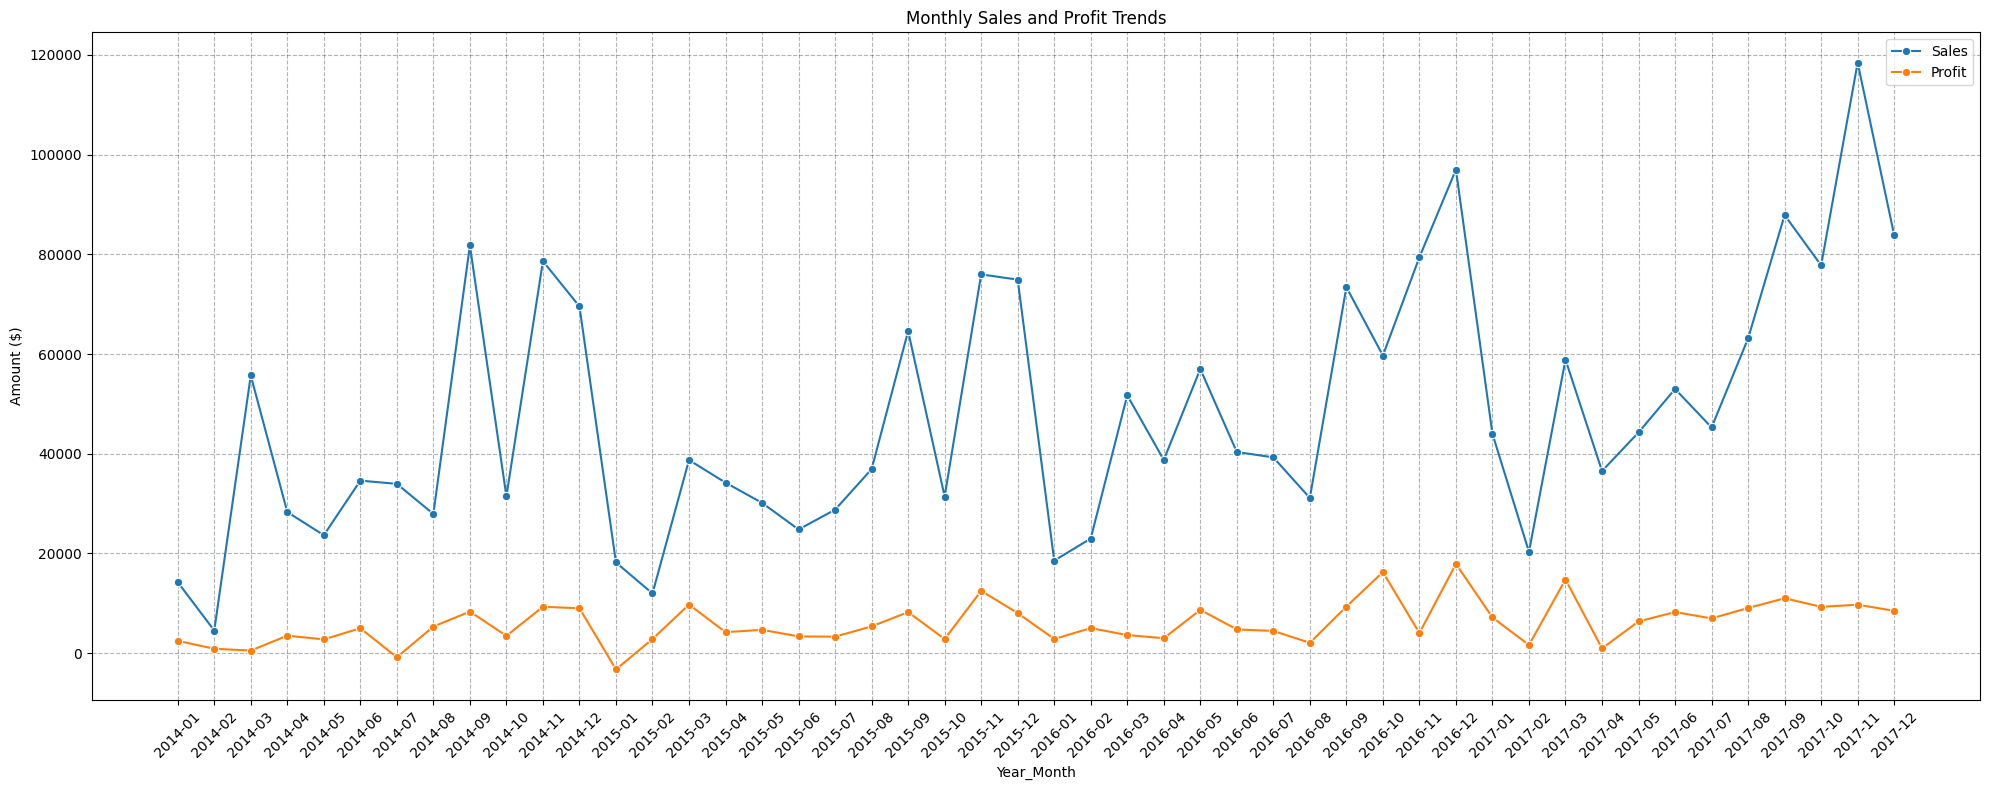

In [18]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=monthly_trends, x="Year_Month", y="Sales", label="Sales", marker="o")
sns.lineplot(data=monthly_trends, x="Year_Month", y="Profit", label="Profit", marker="o")

plt.title("Monthly Sales and Profit Trends")
plt.ylabel("Amount ($)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(linestyle="--", color="black", alpha=0.3)
plt.tight_layout()
plt.show()

##### Low-Profit Months

In [19]:
loss_months = monthly_trends[monthly_trends["Profit"] < 0]
loss_months

,Sales,Profit,Profit Margin (%)
Year_Month,,,
2014-07,33946.39,-841.48,-2.48
2015-01,18174.08,-3281.01,-18.05


##### Month-wise Average Profit Across All Years

In [20]:
df["Month"] = df["Order Date"].dt.month_name()
avg_monthly = df.groupby(["Month"])[["Sales", "Profit"]].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
avg_monthly = avg_monthly.round(2)
avg_monthly

,Sales,Profit
Month,,
January,249.15,23.97
February,199.17,34.32
March,294.55,41.08
April,206.23,17.35
May,210.92,30.49
June,213.00,29.69
July,207.38,19.48
August,225.27,30.85
September,222.45,26.65


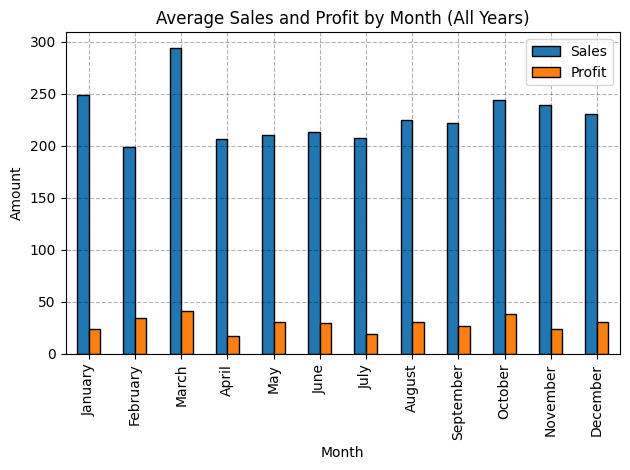

In [21]:
avg_monthly.plot(kind="bar", ax=plt.gca(), edgecolor="black")
plt.title("Average Sales and Profit by Month (All Years)")
plt.ylabel("Amount")
plt.xlabel("Month")
plt.tight_layout()
plt.grid(linestyle="--", color="black", alpha=0.3)
plt.show()

##### Shipping Delay by Month

In [22]:
df["Delay"] = (df["Ship Date"] - df["Order Date"]).dt.days
monthly_delay = df.groupby(df["Order Date"].dt.to_period("M"))["Delay"].mean().sort_index()
monthly_delay = monthly_delay.round(2)
monthly_delay

Order Date
2014-01    4.16
2014-02    4.17
2014-03    3.97
2014-04    4.05
2014-05    3.80
2014-06    4.18
2014-07    3.84
2014-08    4.05
2014-09    4.06
2014-10    3.36
2014-11    4.26
2014-12    3.96
2015-01    4.74
2015-02    4.11
2015-03    3.70
2015-04    4.34
2015-05    4.03
2015-06    4.15
2015-07    3.72
2015-08    3.96
2015-09    4.29
2015-10    3.59
2015-11    3.98
2015-12    3.92
2016-01    4.10
2016-02    3.52
2016-03    3.51
2016-04    4.46
2016-05    3.88
2016-06    3.42
2016-07    3.82
2016-08    4.33
2016-09    4.01
2016-10    4.19
2016-11    3.94
2016-12    4.03
2017-01    4.11
2017-02    4.37
2017-03    3.57
2017-04    3.82
2017-05    3.73
2017-06    4.06
2017-07    4.15
2017-08    4.04
2017-09    3.69
2017-10    3.97
2017-11    3.81
2017-12    4.04
Freq: M, Name: Delay, dtype: float64

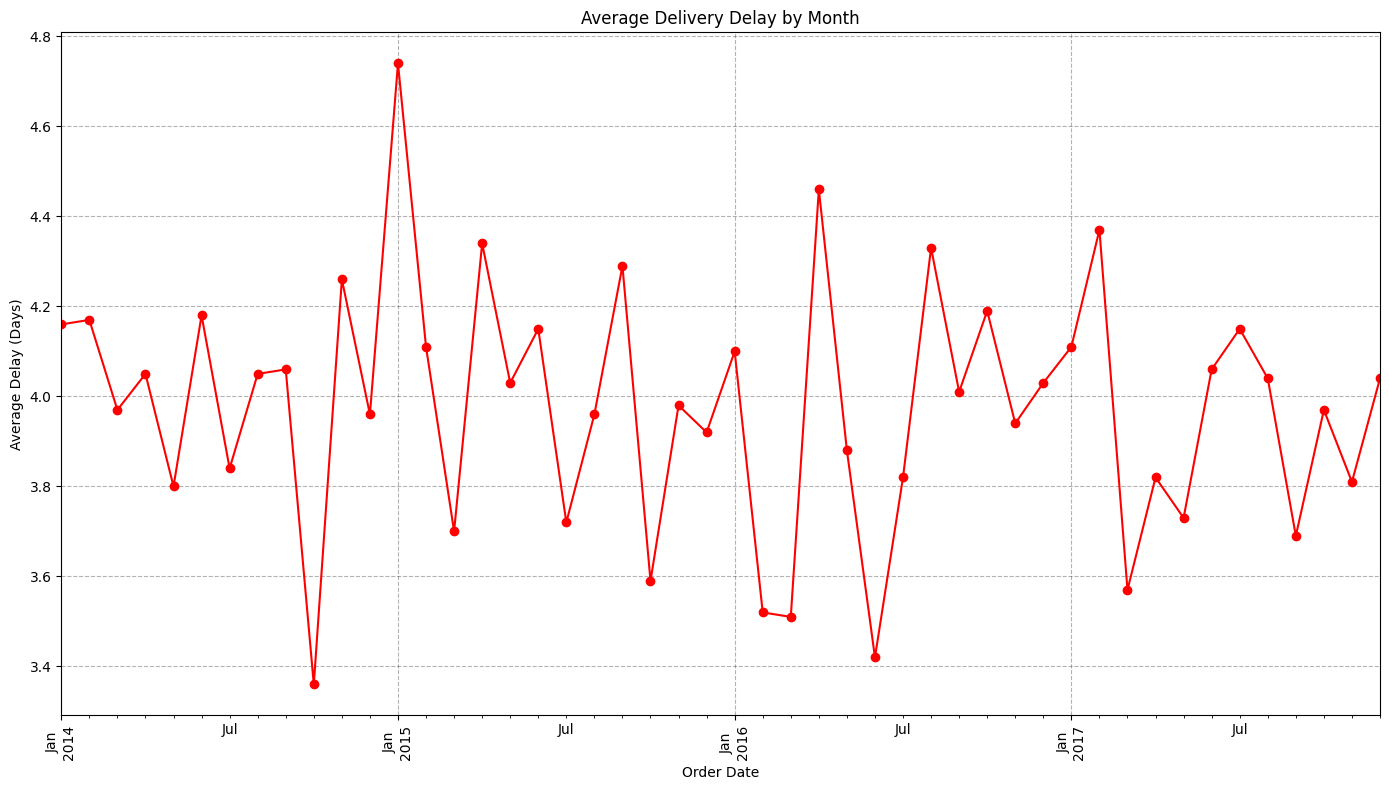

In [23]:
monthly_delay.plot(color="red", marker="o", figsize=(14, 8))
plt.title("Average Delivery Delay by Month")
plt.ylabel("Average Delay (Days)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(linestyle="--", color="black", alpha=0.3)
plt.show()

### Segment-wise Performance

In [24]:
segment_summary = df.groupby("Segment")[["Sales", "Profit", "Discount", "Quantity"]].agg({
    "Sales" : "sum",
    "Profit" : "sum",
    "Discount" : "mean",
    "Quantity" : "sum"
}).sort_values(by="Profit", ascending=False)

segment_summary = segment_summary.round(2)
segment_summary

,Sales,Profit,Discount,Quantity
Segment,,,,
Consumer,1161401.34,134119.21,0.16,19521
Corporate,706146.37,91979.13,0.16,11608
Home Office,429653.15,60298.68,0.15,6744


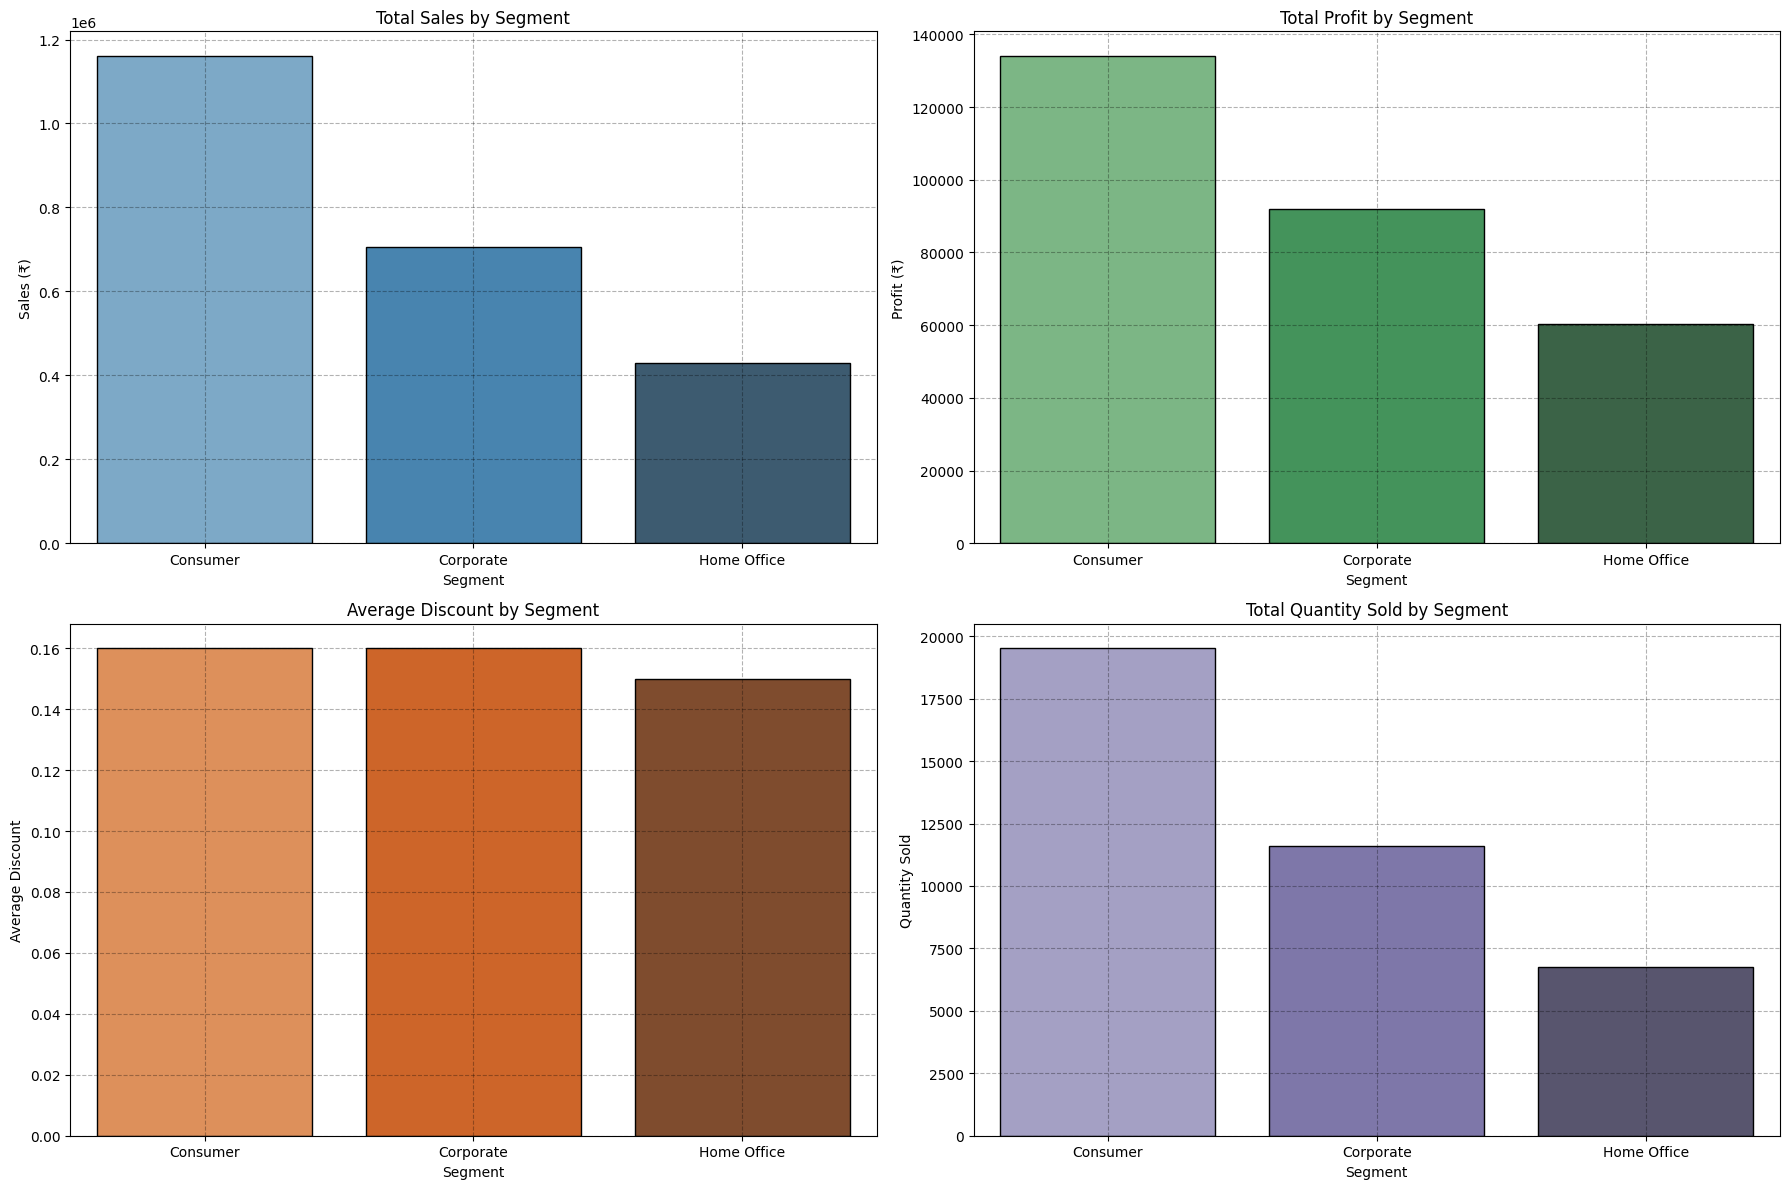

In [25]:
segment_data = pd.DataFrame({
    "Segment" : ["Consumer", "Corporate", "Home Office"],
    "Sales" : [1161401.34, 706146.37, 429653.15],
    "Profit" : [134119.21, 91979.13, 60298.68],
    "Discount" : [0.16, 0.16, 0.15],
    "Quantity" : [19521, 11608, 6744]
})

plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.barplot(data=segment_data, x="Segment", y="Sales", palette="Blues_d", edgecolor="black")
plt.title("Total Sales by Segment")
plt.xlabel("Segment")
plt.ylabel("Sales (₹)")
plt.grid(linestyle="--", color="black", alpha=0.3)

plt.subplot(2, 2, 2)
sns.barplot(data=segment_data, x="Segment", y="Profit", palette="Greens_d", edgecolor="black")
plt.title("Total Profit by Segment")
plt.xlabel("Segment")
plt.ylabel("Profit (₹)")
plt.grid(linestyle="--", color="black", alpha=0.3)

plt.subplot(2, 2, 3)
sns.barplot(data=segment_data, x="Segment", y="Discount", palette="Oranges_d", edgecolor="black")
plt.title("Average Discount by Segment")
plt.xlabel("Segment")
plt.ylabel("Average Discount")
plt.grid(linestyle="--", color="black", alpha=0.3)

plt.subplot(2, 2, 4)
sns.barplot(data=segment_data, x="Segment", y="Quantity", palette="Purples_d", edgecolor="black")
plt.title("Total Quantity Sold by Segment")
plt.xlabel("Segment")
plt.ylabel("Quantity Sold")
plt.grid(linestyle="--", color="black", alpha=0.3)

plt.tight_layout()
plt.show()

##### The top-selling products for each customer segment by total quantity or total sales.

In [26]:
product_segment = df.groupby(["Segment", "Product Name"])["Quantity"].sum().reset_index()
product_segment

,Segment,Product Name,Quantity
0,Consumer,"""While you Were Out"" Message Book, One Form pe...",5
1,Consumer,"#10 Gummed Flap White Envelopes, 100/Box",6
2,Consumer,#10 Self-Seal White Envelopes,1
3,Consumer,"#10 White Business Envelopes,4 1/8 x 9 1/2",9
4,Consumer,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",16
...,...,...,...
4249,Home Office,i.Sound Portable Power - 8000 mAh,3
4250,Home Office,iHome FM Clock Radio with Lightning Dock,5
4251,Home Office,iKross Bluetooth Portable Keyboard + Cell Phon...,2
4252,Home Office,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,3


In [27]:
top_products_by_segment = product_segment.sort_values(["Segment", "Quantity"], ascending=[True, False])
top_products_by_segment

,Segment,Product Name,Quantity
1373,Consumer,Staple envelope,104
1378,Consumer,Staples,97
1379,Consumer,Staples in misc. colors,75
1388,Consumer,Storex Dura Pro Binders,61
492,Consumer,Easy-staple paper,60
...,...,...,...
4139,Home Office,Wirebound Voice Message Log Book,1
4142,Home Office,Xerox 188,1
4148,Home Office,Xerox 1886,1
4208,Home Office,Xerox 1991,1


In [28]:
top_5_each_segment = top_products_by_segment.groupby("Segment").head()
top_5_each_segment

,Segment,Product Name,Quantity
1373,Consumer,Staple envelope,104
1378,Consumer,Staples,97
1379,Consumer,Staples in misc. colors,75
1388,Consumer,Storex Dura Pro Binders,61
492,Consumer,Easy-staple paper,60
2887,Corporate,Staples,90
2881,Corporate,Staple envelope,63
2119,Corporate,Easy-staple paper,44
2300,Corporate,"Global High-Back Leather Tilter, Burgundy",32
1765,Corporate,"Acco Pressboard Covers with Storage Hooks, 14 ...",31


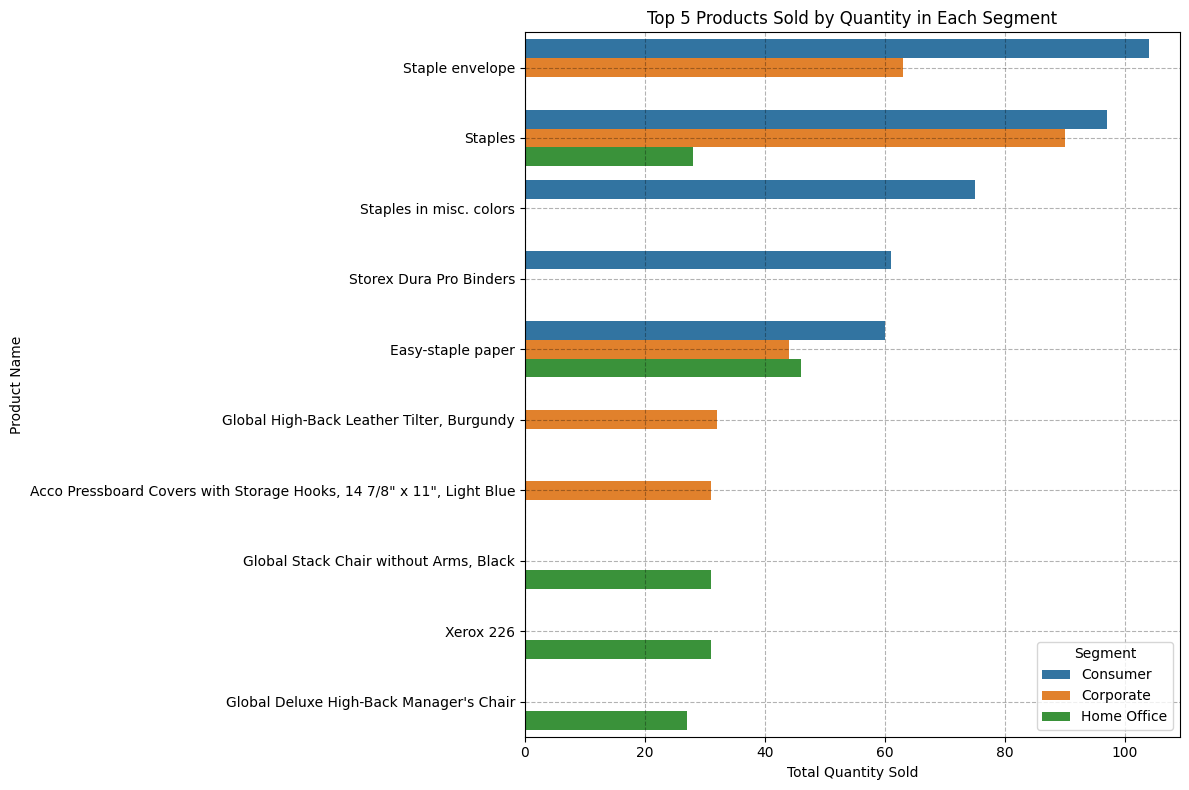

In [29]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_5_each_segment, x="Quantity", y="Product Name", hue="Segment")
plt.title("Top 5 Products Sold by Quantity in Each Segment")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.legend(title="Segment")
plt.tight_layout()
plt.grid(linestyle="--", color="black", alpha=0.3)
plt.show()

##### Segment-wise State Analysis (by Sales)

In [30]:
segment_state_sales = df.groupby(["Segment", "State"])["Sales"].sum().reset_index()
segment_state_sales

,Segment,State,Sales
0,Consumer,Alabama,7537.540
1,Consumer,Arizona,16424.422
2,Consumer,Arkansas,8802.010
3,Consumer,California,229636.080
4,Consumer,Colorado,15794.492
...,...,...,...
135,Home Office,Virginia,7451.610
136,Home Office,Washington,25047.640
137,Home Office,West Virginia,536.480
138,Home Office,Wisconsin,5486.620


In [31]:
top_states_by_segment = segment_state_sales.sort_values(["Segment", "Sales"], ascending=[True, False])
top_states_by_segment

,Segment,State,Sales
3,Consumer,California,229636.080
29,Consumer,New York,175209.035
40,Consumer,Texas,95976.378
44,Consumer,Washington,73866.520
35,Consumer,Pennsylvania,66899.293
...,...,...,...
102,Home Office,Idaho,307.740
99,Home Office,District of Columbia,111.680
109,Home Office,Maine,106.080
124,Home Office,North Dakota,28.380


In [32]:
top_5_states_each_segment = top_states_by_segment.groupby("Segment").head()
top_5_states_each_segment

,Segment,State,Sales
3,Consumer,California,229636.0800
29,Consumer,New York,175209.0350
40,Consumer,Texas,95976.3780
44,Consumer,Washington,73866.5200
35,Consumer,Pennsylvania,66899.2930
50,Corporate,California,147174.7265
76,Corporate,New York,77951.3130
86,Corporate,Texas,53908.1198
90,Corporate,Washington,39727.1100
58,Corporate,Indiana,31788.7400


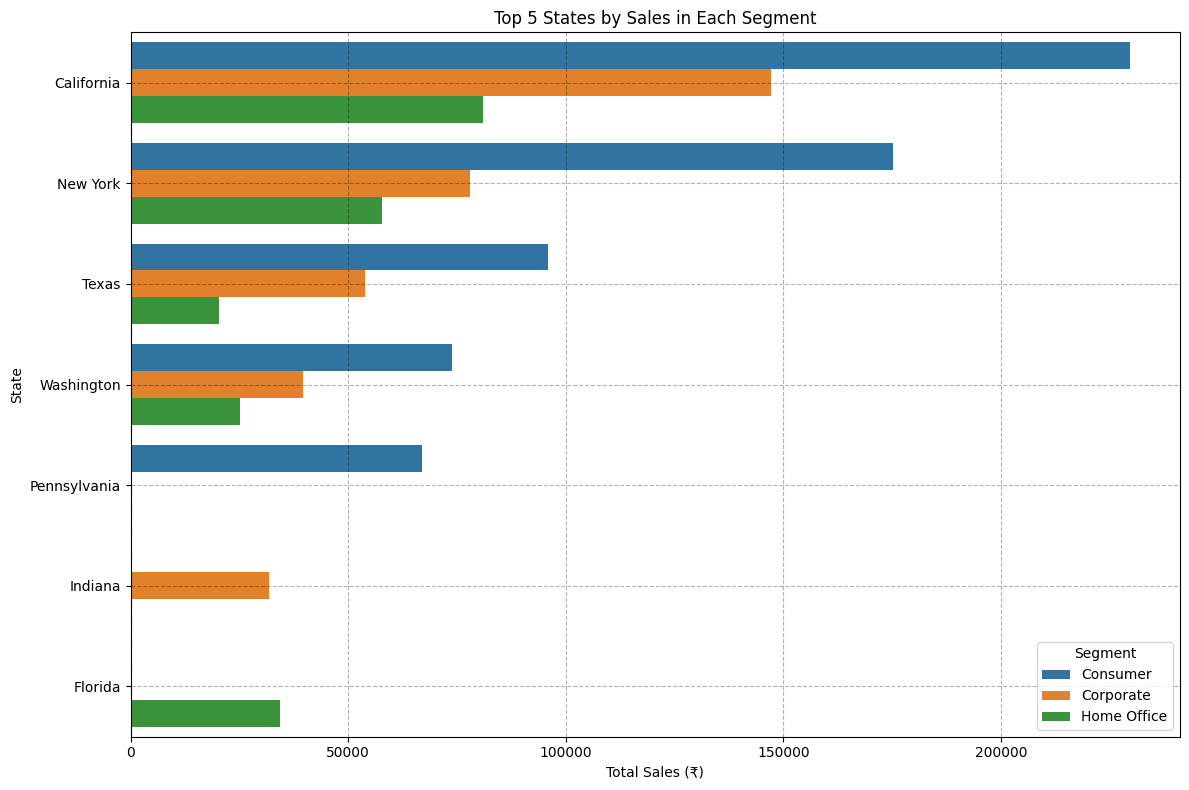

In [33]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_5_states_each_segment, x="Sales", y="State", hue="Segment")
plt.title("Top 5 States by Sales in Each Segment")
plt.xlabel("Total Sales (₹)")
plt.ylabel("State")
plt.legend(title="Segment")
plt.tight_layout()
plt.grid(linestyle="--", color="black", alpha=0.3)
plt.show()

##### Top 5 States by Order Count for Each Segment

In [34]:
segment_state_orders = df.groupby(["Segment", "State"])["Order ID"].nunique().reset_index(name="Order Count")
segment_state_orders

,Segment,State,Order Count
0,Consumer,Alabama,14
1,Consumer,Arizona,56
2,Consumer,Arkansas,16
3,Consumer,California,525
4,Consumer,Colorado,40
...,...,...,...
135,Home Office,Virginia,22
136,Home Office,Washington,53
137,Home Office,West Virginia,1
138,Home Office,Wisconsin,13


In [35]:
top_states_by_orders = segment_state_orders.sort_values(["Segment", "Order Count"], ascending=[True, False])
top_states_by_orders

,Segment,State,Order Count
3,Consumer,California,525
29,Consumer,New York,304
40,Consumer,Texas,255
11,Consumer,Illinois,153
35,Consumer,Pennsylvania,141
...,...,...,...
124,Home Office,North Dakota,1
130,Home Office,South Carolina,1
134,Home Office,Vermont,1
137,Home Office,West Virginia,1


In [36]:
top_5_states_per_segment_orders = top_states_by_orders.groupby("Segment").head()
top_5_states_per_segment_orders

,Segment,State,Order Count
3,Consumer,California,525
29,Consumer,New York,304
40,Consumer,Texas,255
11,Consumer,Illinois,153
35,Consumer,Pennsylvania,141
50,Corporate,California,311
76,Corporate,New York,165
86,Corporate,Texas,157
81,Corporate,Pennsylvania,93
90,Corporate,Washington,72


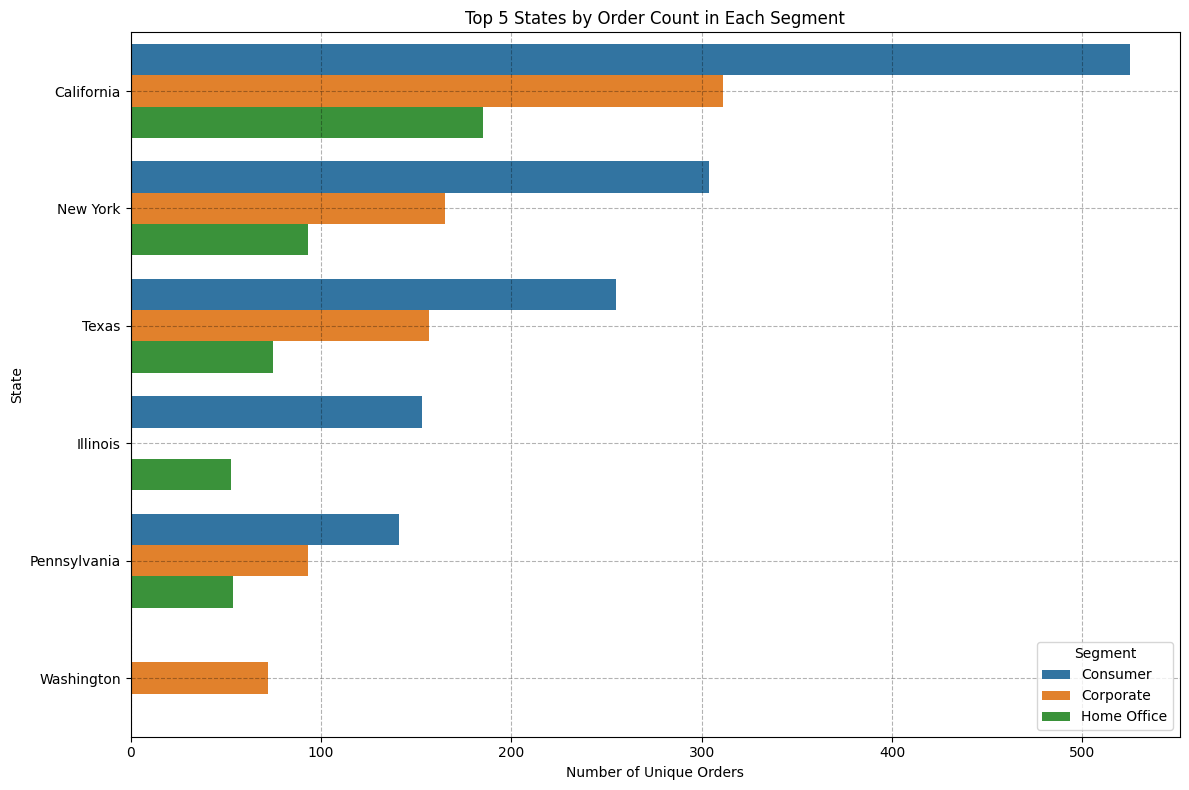

In [37]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_5_states_per_segment_orders, x="Order Count", y="State", hue="Segment")
plt.title("Top 5 States by Order Count in Each Segment")
plt.xlabel("Number of Unique Orders")
plt.ylabel("State")
plt.legend(title="Segment")
plt.tight_layout()
plt.grid(linestyle="--", color="black", alpha=0.3)
plt.show()

### Discount v/s Profit Correlation

In [38]:
correlation = df["Discount"].corr(df["Profit"])
correlation

np.float64(-0.21948745637176834)

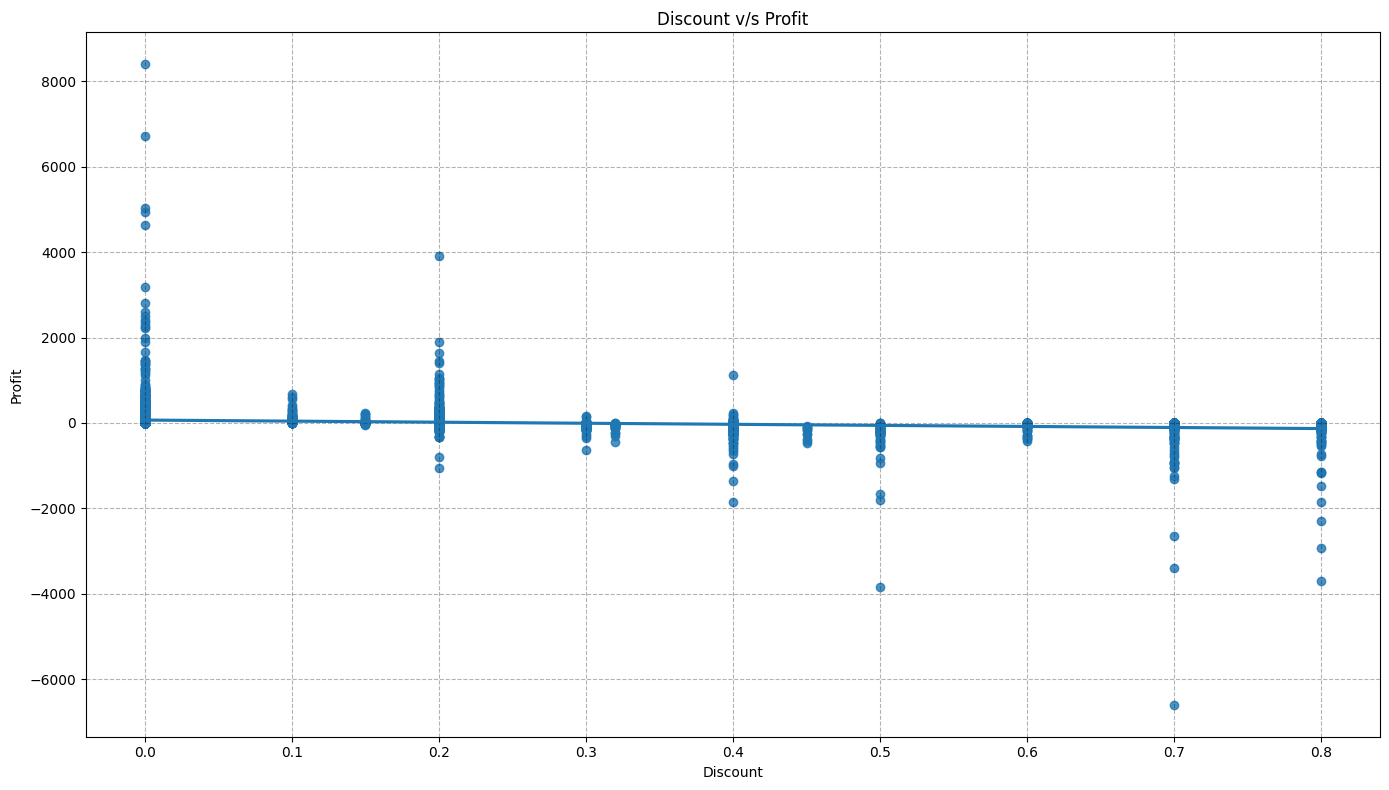

In [39]:
plt.figure(figsize=(14, 8))
sns.regplot(data=df, x="Discount", y="Profit")
plt.title("Discount v/s Profit")
plt.grid(linestyle="--", color="black", alpha=0.3)
plt.tight_layout()
plt.show()

##### Which Sub-Categories Are Giving Highest Discounts?

In [40]:
df.groupby("Sub-Category")["Discount"].mean().sort_values(ascending=False).round(2)

Sub-Category
Binders        0.37
Machines       0.31
Tables         0.26
Bookcases      0.21
Chairs         0.17
Appliances     0.17
Copiers        0.16
Phones         0.15
Furnishings    0.14
Fasteners      0.08
Envelopes      0.08
Accessories    0.08
Supplies       0.08
Paper          0.07
Art            0.07
Storage        0.07
Labels         0.07
Name: Discount, dtype: float64

In [41]:
binders_products = df[df["Sub-Category"] == "Binders"]
binders_products["Product Name"].nunique()

211

Which Binder Products Are Heavily Discounted or Unprofitable

In [42]:
binders_summary = binders_products.groupby("Product Name")[["Discount", "Profit"]].mean().round(2)
binders_summary = binders_summary.sort_values(by="Discount", ascending=False)
binders_summary

,Discount,Profit
Product Name,,
GBC Plasticlear Binding Covers,0.73,-9.77
GBC VeloBinder Electric Binding Machine,0.72,-102.83
"Premier Elliptical Ring Binder, Black",0.64,-22.39
Wilson Jones Custom Binder Spines & Labels,0.63,-2.81
Acco D-Ring Binder w/DublLock,0.62,-11.43
...,...,...
"Acco PRESSTEX Data Binder with Storage Hooks, Dark Blue, 14 7/8"" X 11""",0.11,10.55
3-ring staple pack,0.10,2.78
Durable Pressboard Binders,0.10,7.54


In [43]:
# Heavily discounted and also losing money

binders_loss = binders_summary[(binders_summary["Discount"] > 0.5) & (binders_summary["Profit"] < 0)]
binders_loss

,Discount,Profit
Product Name,,
GBC Plasticlear Binding Covers,0.73,-9.77
GBC VeloBinder Electric Binding Machine,0.72,-102.83
"Premier Elliptical Ring Binder, Black",0.64,-22.39
Wilson Jones Custom Binder Spines & Labels,0.63,-2.81
Acco D-Ring Binder w/DublLock,0.62,-11.43
"Avery Triangle Shaped Sheet Lifters, Black, 2/Pack",0.62,-0.82
Avery Durable Slant Ring Binders,0.62,-4.75
Avery Hidden Tab Dividers for Binding Systems,0.61,-1.00
Acco Economy Flexible Poly Round Ring Binder,0.60,-1.44


##### Which Sub-Categories Have Lowest Average Profit or Even Loss?

In [44]:
df.groupby("Sub-Category")["Profit"].mean().sort_values().round(2)

Sub-Category
Tables         -55.57
Bookcases      -15.23
Supplies        -6.26
Fasteners        4.38
Art              8.20
Furnishings     13.65
Labels          15.24
Binders         19.84
Paper           24.86
Storage         25.15
Envelopes       27.42
Machines        29.43
Appliances      38.92
Chairs          43.10
Phones          50.07
Accessories     54.11
Copiers        817.91
Name: Profit, dtype: float64

In [45]:
table_products = df[df["Sub-Category"] == "Tables"]
table_products["Product Name"].nunique()

56

In [46]:
table_summary = table_products.groupby("Product Name")[["Discount", "Profit"]].mean().round(2)
table_summary = table_summary.sort_values(by="Profit").head(20)
table_summary

,Discount,Profit
Product Name,,
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,0.28,-575.22
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables,0.48,-382.81
Balt Solid Wood Round Tables,0.20,-300.26
Bush Advantage Collection Racetrack Conference Table,0.35,-276.34
Bretford “Just In Time” Height-Adjustable Multi-Task Work Tables,0.22,-241.05
"Riverside Furniture Oval Coffee Table, Oval End Table, End Table with Drawer",0.30,-229.48
BPI Conference Tables,0.37,-159.19
"Bevis Traditional Conference Table Top, Plinth Base",0.33,-152.23
Bevis Rectangular Conference Tables,0.48,-146.71


In [47]:
df[df["Sub-Category"] == "Tables"][["Discount", "Profit"]].corr()

,Discount,Profit
Discount,1.00000,-0.67177
Profit,-0.67177,1.00000


##### Which are the top 10 products where we lose money due to discounts

In [48]:
product_stats = df.groupby("Product Name")[["Discount", "Profit"]].mean().round(2)
product_stats = product_stats.sort_values(by="Discount", ascending=False)
product_stats

,Discount,Profit
Product Name,,
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac,0.80,-4.47
GBC Plasticlear Binding Covers,0.73,-9.77
GBC VeloBinder Electric Binding Machine,0.72,-102.83
Epson Perfection V600 Photo Scanner,0.70,-172.49
"Bush Westfield Collection Bookcases, Dark Cherry Finish, Fully Assembled",0.70,-190.85
...,...,...
Tenex Chairmats For Use With Carpeted Floors,0.00,2.20
Xerox 20,0.00,3.11
"3D Systems Cube Printer, 2nd Generation, Magenta",0.00,1858.99


In [49]:
# Products with high discount and negative profit
high_discount_loss = product_stats[(product_stats["Discount"] > 0.2) & (product_stats["Profit"] < 0)]
high_discount_loss.head(10)

,Discount,Profit
Product Name,,
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac,0.80,-4.47
GBC Plasticlear Binding Covers,0.73,-9.77
GBC VeloBinder Electric Binding Machine,0.72,-102.83
Epson Perfection V600 Photo Scanner,0.70,-172.49
"Bush Westfield Collection Bookcases, Dark Cherry Finish, Fully Assembled",0.70,-190.85
Hewlett-Packard Deskjet F4180 All-in-One Color Ink-jet - Printer / copier / scanner,0.70,-71.40
Zebra GK420t Direct Thermal/Thermal Transfer Printer,0.70,-938.28
Okidata B401 Printer,0.70,-251.99
Cisco 8961 IP Phone Charcoal,0.70,-164.95


In [50]:
sales_volume = df.groupby("Product Name").size().rename("Sale Count")

final_impact = high_discount_loss.join(sales_volume)
final_impact = final_impact.sort_values(by="Profit").head(20)
final_impact

,Discount,Profit,Sale Count
Product Name,,,
Cubify CubeX 3D Printer Triple Head Print,0.50,-3839.99,1
Cubify CubeX 3D Printer Double Head Print,0.53,-2959.99,3
Cisco TelePresence System EX90 Videoconferencing Unit,0.50,-1811.08,1
Lexmark MX611dhe Monochrome Laser Printer,0.40,-1147.49,4
Zebra GK420t Direct Thermal/Thermal Transfer Printer,0.70,-938.28,1
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,0.28,-575.22,5
Epson TM-T88V Direct Thermal Printer - Monochrome - Desktop,0.55,-528.62,2
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables,0.48,-382.81,3
LG G2,0.40,-374.99,1


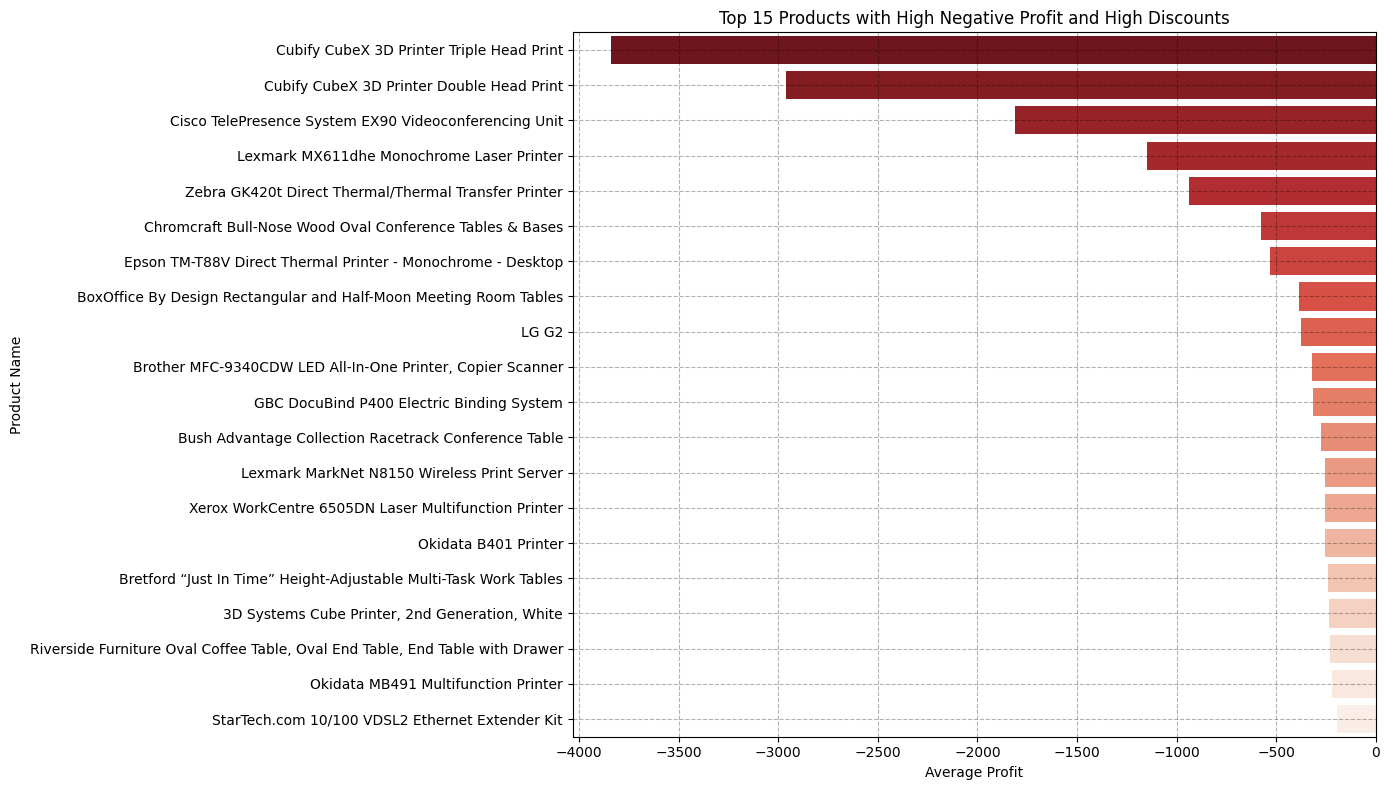

In [51]:
plt.figure(figsize=(14, 8))
sns.barplot(data=final_impact.reset_index(),
            x="Profit",
            y="Product Name",
            palette="Reds_r"
            )

plt.title("Top 15 Products with High Negative Profit and High Discounts")
plt.xlabel("Average Profit")
plt.ylabel("Product Name")
plt.tight_layout()
plt.grid(linestyle="--", color="black", alpha=0.3)
plt.show()

### Shipping Performance

In [52]:
order_count = df["Ship Mode"].value_counts()
order_count

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [53]:
avg_delay = df.groupby("Ship Mode")["Delay"].mean().sort_values().round(2)
avg_delay

Ship Mode
Same Day          0.04
First Class       2.18
Second Class      3.24
Standard Class    5.01
Name: Delay, dtype: float64

In [54]:
avg_profit = df.groupby("Ship Mode")["Profit"].mean().sort_values(ascending=False).round(2)
avg_profit

Ship Mode
First Class       31.84
Second Class      29.54
Same Day          29.27
Standard Class    27.49
Name: Profit, dtype: float64

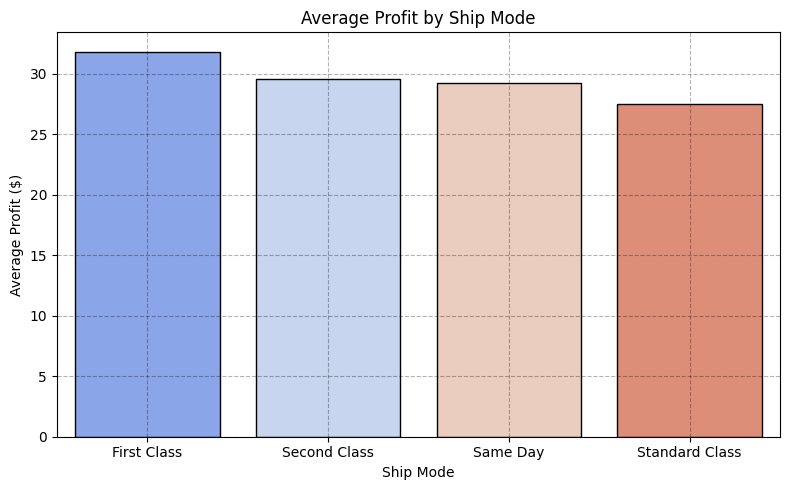

In [55]:
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_profit.index, y=avg_profit.values, palette="coolwarm", edgecolor="black")
plt.title("Average Profit by Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Average Profit ($)")
plt.tight_layout()
plt.grid(linestyle="--", color="black", alpha=0.3)
plt.show()

##### In each state, which ship mode is used the most?

In [56]:
state_ship_counts = df.groupby(["State", "Ship Mode"]).size().reset_index(name="Count")
top_ship_mode_by_state = state_ship_counts.sort_values(["State", "Count"], ascending=[True, False]).drop_duplicates("State")
top_ship_mode_by_state = top_ship_mode_by_state.sort_values("Count", ascending=False)
top_ship_mode_by_state.head(20)

,State,Ship Mode,Count
15,California,Standard Class,1165
115,New York,Standard Class,678
154,Texas,Standard Class,602
136,Pennsylvania,Standard Class,371
44,Illinois,Standard Class,295
168,Washington,Standard Class,294
33,Florida,Standard Class,234
125,Ohio,Standard Class,230
77,Michigan,Standard Class,168
119,North Carolina,Standard Class,155


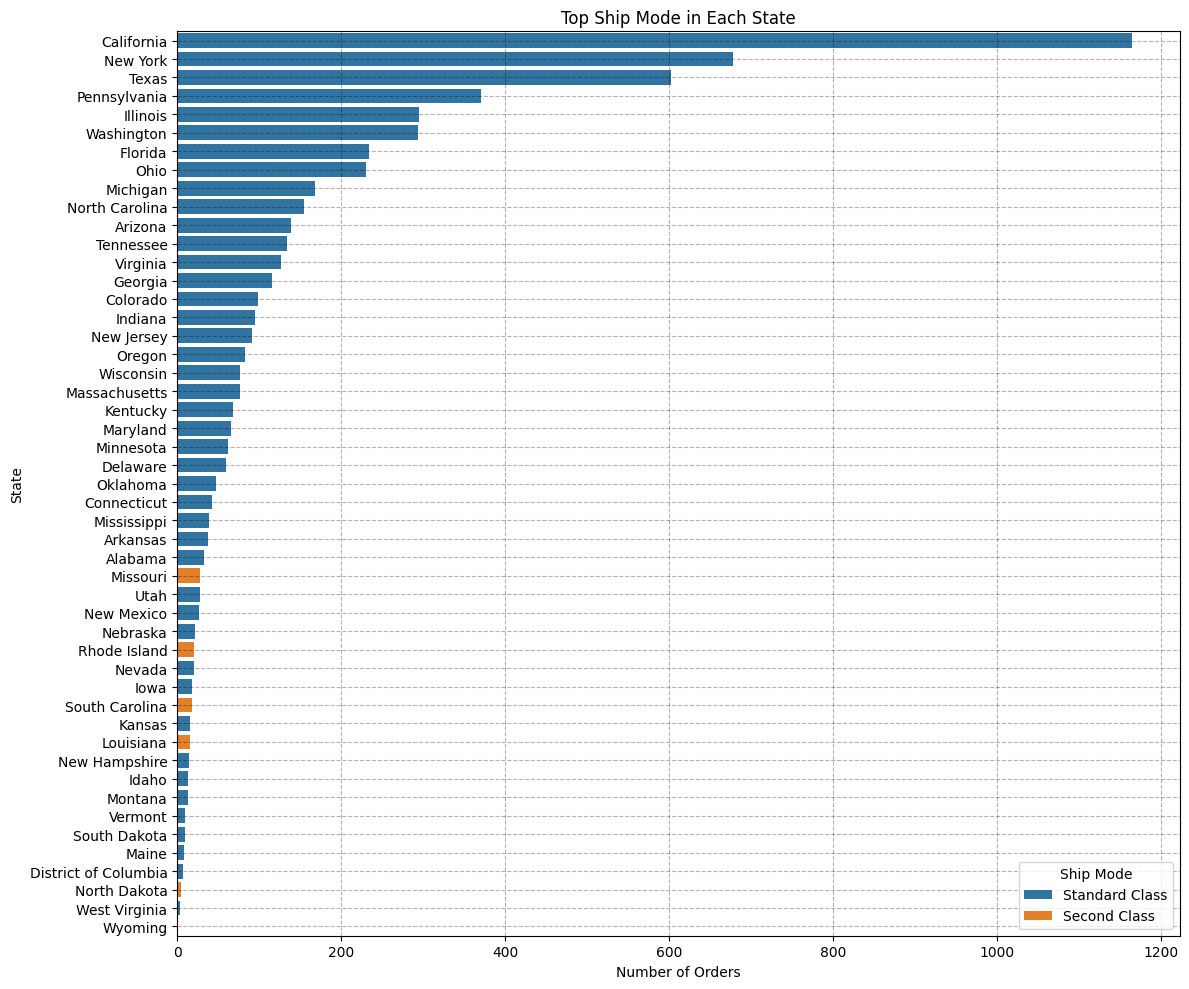

In [57]:
plt.figure(figsize=(12, 10))
sns.barplot(data=top_ship_mode_by_state, x="Count", y="State", hue="Ship Mode", dodge=False)
plt.title("Top Ship Mode in Each State")
plt.xlabel("Number of Orders")
plt.ylabel("State")
plt.legend(title="Ship Mode", loc="lower right")
plt.tight_layout()
plt.grid(linestyle="--", color="black", alpha=0.3)
plt.show()

##### Ship Mode Preference by Customer Segment

In [58]:
segment_ship_counts = df.groupby(["Segment", "Ship Mode"]).size().reset_index(name="Count")
segment_ship_counts

,Segment,Ship Mode,Count
0,Consumer,First Class,769
1,Consumer,Same Day,317
2,Consumer,Second Class,1020
3,Consumer,Standard Class,3085
4,Corporate,First Class,485
5,Corporate,Same Day,114
6,Corporate,Second Class,609
7,Corporate,Standard Class,1812
8,Home Office,First Class,284
9,Home Office,Same Day,112


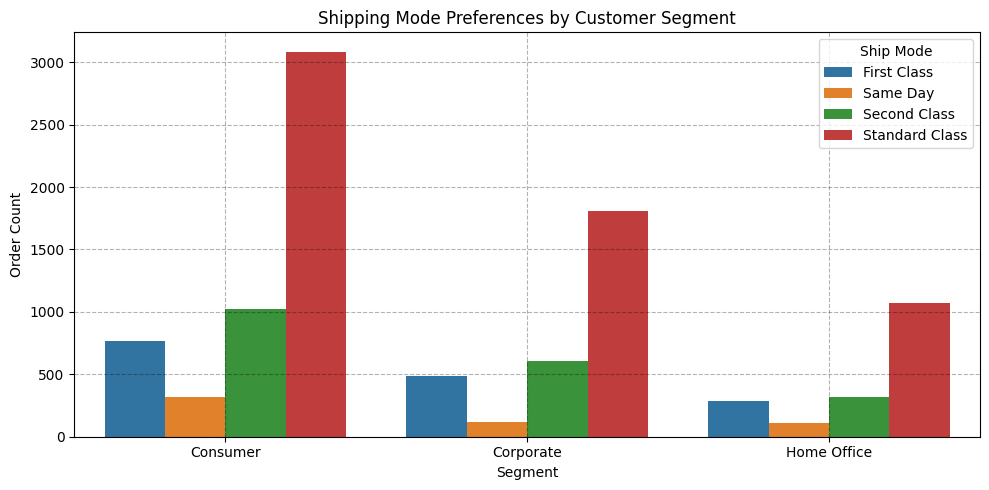

In [59]:
plt.figure(figsize=(10, 5))
sns.barplot(data=segment_ship_counts, x="Segment", y="Count", hue="Ship Mode")
plt.title("Shipping Mode Preferences by Customer Segment")
plt.ylabel("Order Count")
plt.tight_layout()
plt.grid(linestyle="--", color="black", alpha=0.3)
plt.show()

### Customers Analysis

##### Top Customers by Quantity and Profit

In [60]:
top_customers = df.groupby("Customer ID").agg({
    "Customer Name" : "first",
    "Quantity" : "sum",
    "Profit" : "sum",
    "Sales" : "sum"
}).sort_values(by="Quantity", ascending=False).head(15).round(2)

top_customers

,Customer Name,Quantity,Profit,Sales
Customer ID,,,,
JD-15895,Jonathan Doherty,150,1050.27,7610.86
WB-21850,William Brown,146,714.33,6160.10
JL-15835,John Lee,143,228.91,9799.92
PP-18955,Paul Prost,138,1495.09,7252.61
SC-20725,Steven Cartwright,133,1276.65,5226.21
EP-13915,Emily Phan,124,144.96,5478.06
CB-12025,Cassandra Brandow,122,150.21,6076.14
CK-12205,Chloris Kastensmidt,122,141.28,3154.86
EH-13765,Edward Hooks,120,1393.52,10310.88


##### Repeat Customers

In [61]:
customer_orders = df.groupby("Customer ID")["Order ID"].nunique()
customer_orders

Customer ID
AA-10315     5
AA-10375     9
AA-10480     4
AA-10645     6
AB-10015     3
            ..
XP-21865    11
YC-21895     5
YS-21880     8
ZC-21910    13
ZD-21925     5
Name: Order ID, Length: 793, dtype: int64

In [62]:
repeat_customers = customer_orders[customer_orders > 1].index
repeat_customers

Index(['AA-10315', 'AA-10375', 'AA-10480', 'AA-10645', 'AB-10015', 'AB-10060',
       'AB-10105', 'AB-10150', 'AB-10165', 'AB-10255',
       ...
       'VP-21760', 'VS-21820', 'VT-21700', 'VW-21775', 'WB-21850', 'XP-21865',
       'YC-21895', 'YS-21880', 'ZC-21910', 'ZD-21925'],
      dtype='object', name='Customer ID', length=781)

In [63]:
repeat_customers_summary = df[df["Customer ID"].isin(repeat_customers)].groupby("Customer ID").agg({
    "Customer Name" : "first",
    "Order ID" : "nunique",
    "Profit" : "sum"
}).sort_values(by="Profit", ascending=False).head(15)

repeat_customers_summary

,Customer Name,Order ID,Profit
Customer ID,,,
TC-20980,Tamara Chand,5,8981.3239
RB-19360,Raymond Buch,6,6976.0959
SC-20095,Sanjit Chand,9,5757.4119
HL-15040,Hunter Lopez,6,5622.4292
AB-10105,Adrian Barton,10,5444.8055
TA-21385,Tom Ashbrook,4,4703.7883
CM-12385,Christopher Martinez,4,3899.8904
KD-16495,Keith Dawkins,12,3038.6254
AR-10540,Andy Reiter,6,2884.6208


##### Top Postal Codes by Unique Customers and Profit

In [64]:
postal_summary = df.groupby("Postal Code").agg({
    "Customer Name" : pd.Series.nunique,
    "Profit" : "sum"
}).rename(columns={"Customer Name" : "Unique Customers"}).sort_values(by="Unique Customers", ascending=False).head(15)

postal_summary

,Unique Customers,Profit
Postal Code,,
10035,118,16533.8669
10024,115,21653.7248
10009,105,13697.0019
94122,95,7712.5958
10011,92,10152.3901
94110,82,5397.3363
94109,78,4397.4533
98105,74,8734.6042
98103,72,7117.6170


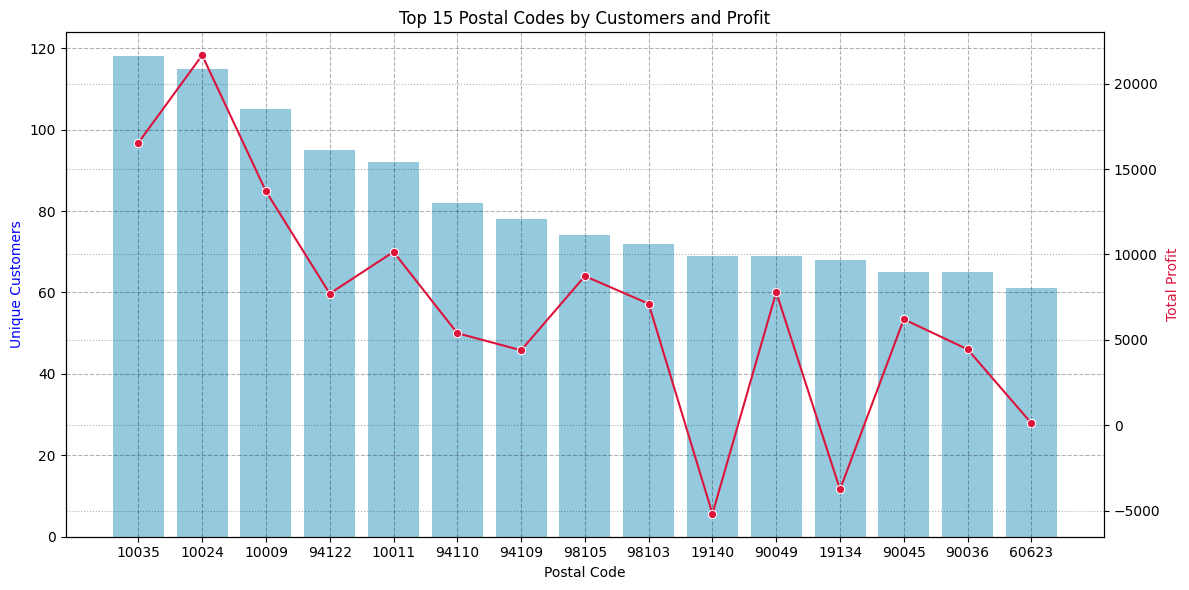

In [65]:
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(data=postal_summary, x=postal_summary.index.astype(str), y="Unique Customers", color="skyblue", ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data=postal_summary, x=postal_summary.index.astype(str), y="Profit", color="crimson", marker="o", ax=ax2)

ax1.set_xlabel("Postal Code")
ax1.set_ylabel("Unique Customers", color="blue")
ax1.grid(linestyle="--", color="black", alpha=0.3)
ax2.set_ylabel("Total Profit", color="crimson")
ax2.grid(linestyle=":", color="black", alpha=0.3)
plt.title("Top 15 Postal Codes by Customers and Profit")
plt.tight_layout()
plt.show()

##### Customers Who Purchased the Most But Gave Low or No Profit

In [67]:
low_profit_customers = df.groupby("Customer ID").agg({
    "Customer Name" : "first",
    "Quantity" : "sum",
    "Profit" : "sum",
    "Sales" : "sum"
}).query("Profit < 0").sort_values(by="Quantity", ascending=False).head(15).round(2)

low_profit_customers

,Customer Name,Quantity,Profit,Sales
Customer ID,,,,
LC-16870,Lena Cacioppo,113,-188.25,2580.70
NS-18640,Noel Staavos,113,-234.77,2964.82
ZC-21910,Zuschuss Carroll,105,-1032.15,8025.71
RB-19795,Ross Baird,92,-461.73,5633.32
EB-13750,Edward Becker,91,-80.29,3236.31
MY-18295,Muhammed Yedwab,89,-371.71,4152.70
JA-15970,Joseph Airdo,87,-819.42,6491.03
EA-14035,Erin Ashbrook,87,-52.74,2846.70
TB-21520,Tracy Blumstein,85,-1603.05,4737.49


##### Postal Codes with High Customers but Low Profitability

In [70]:
postal_data = df.groupby("Postal Code").agg({
    "Customer ID" : pd.Series.nunique,
    "Profit" : "sum"
}).rename(columns={"Customer ID" : "Unique Customers"}).round(2)

high_customers_low_profit = postal_data[
    (postal_data["Unique Customers"] > postal_data["Unique Customers"].median()) &
    (postal_data["Profit"] < postal_data["Profit"].median())
].sort_values(by="Unique Customers", ascending=False).head(15)

high_customers_low_profit

,Unique Customers,Profit
Postal Code,,
19140,69,-5168.39
19134,68,-3745.86
19143,61,-3830.75
19120,61,-1092.78
60610,53,-1106.34
43229,52,-729.51
77095,51,-4447.33
60653,51,-5678.80
77041,49,-2302.50


##### What Products Do Customers Prefer? (Product Affinity)

In [81]:
product_prefs = df.pivot_table(
    index="Customer Name",
    columns="Sub-Category",
    values="Quantity",
    aggfunc="sum",
    fill_value=0
)

product_prefs.head()

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Customer Name,,,,,,,,,,,,,,,,,
Aaron Bergman,0,0,3,0,2,1,0,0,0,0,0,0,0,2,5,0,0
Aaron Hawkins,3,0,7,7,0,6,0,8,0,7,3,0,2,9,2,0,0
Aaron Smayling,0,0,0,18,2,0,0,0,0,0,0,5,18,0,2,0,3
Adam Bellavance,5,2,0,9,0,2,0,0,0,2,0,0,26,0,0,3,7
Adam Hart,3,1,5,7,0,3,0,0,5,11,2,0,27,0,0,4,7


In [84]:
top_prefs_customers = product_prefs.sum(axis=1).sort_values(ascending=False).head(15)
top_prefs_customers

Customer Name
Jonathan Doherty       150
William Brown          146
John Lee               143
Paul Prost             138
Steven Cartwright      133
Emily Phan             124
Chloris Kastensmidt    122
Cassandra Brandow      122
Edward Hooks           120
Matt Abelman           117
Ken Lonsdale           113
Sally Hughsby          113
Noel Staavos           113
Lena Cacioppo          113
Seth Vernon            109
dtype: int64

In [88]:
top_pref_table = product_prefs.loc[top_prefs_customers.index]
top_pref_table.head()

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Customer Name,,,,,,,,,,,,,,,,,
Jonathan Doherty,7,7,11,23,0,2,0,5,13,11,0,0,26,12,25,5,3
William Brown,12,8,4,36,0,5,0,4,11,10,0,4,13,22,6,0,11
John Lee,19,9,19,12,0,16,2,0,2,12,9,7,2,9,25,0,0
Paul Prost,10,11,5,17,4,2,0,2,5,15,6,0,25,23,4,0,9
Steven Cartwright,6,0,12,19,0,4,0,9,0,15,12,0,7,17,19,7,6


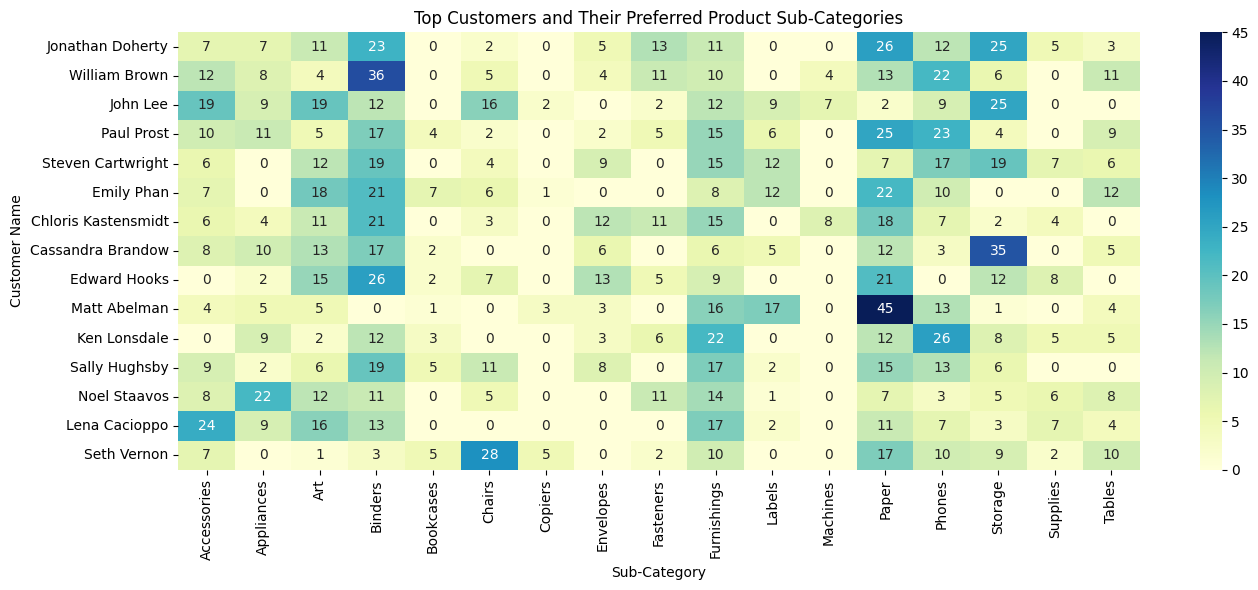

In [89]:
plt.figure(figsize=(14, 6))
sns.heatmap(top_pref_table, annot=True, cmap="YlGnBu", fmt="g")
plt.title("Top Customers and Their Preferred Product Sub-Categories")
plt.xlabel("Sub-Category")
plt.ylabel("Customer Name")
plt.tight_layout()
plt.show()

##### Region-Wise customer profitability

In [91]:
region_customer_data = df.groupby(["Region", "Customer ID"]).agg({
    "Customer Name" : "first",
    "Profit" : "sum",
    "Order ID" : pd.Series.nunique
}).reset_index()

region_customer_data

,Region,Customer ID,Customer Name,Profit,Order ID
0,Central,AA-10315,Alex Avila,-650.5971,2
1,Central,AA-10375,Allen Armold,62.0658,1
2,Central,AA-10480,Andrew Allen,420.4986,2
3,Central,AA-10645,Anna Andreadi,439.3138,1
4,Central,AB-10015,Aaron Bergman,114.3432,2
...,...,...,...,...,...
2496,West,XP-21865,Xylona Preis,298.3414,4
2497,West,YC-21895,Yoseph Carroll,382.0575,2
2498,West,YS-21880,Yana Sorensen,1551.5945,4
2499,West,ZC-21910,Zuschuss Carroll,346.0942,5


In [95]:
region_summary = region_customer_data.groupby("Region").agg({
    "Customer ID" : "nunique",  # Unique Customer Count
    "Profit" : "sum",
    "Order ID" : "sum"  # Total customer engagement
}).rename(columns={
    "Customer ID" : "Unique Customer",
    "Order ID" : "Customer Orders"
}).sort_values(by="Profit", ascending=False).round(2)

region_summary

,Unique Customer,Profit,Customer Orders
Region,,,
West,686,108418.45,1611
East,674,91522.78,1401
South,512,46749.43,822
Central,629,39706.36,1175


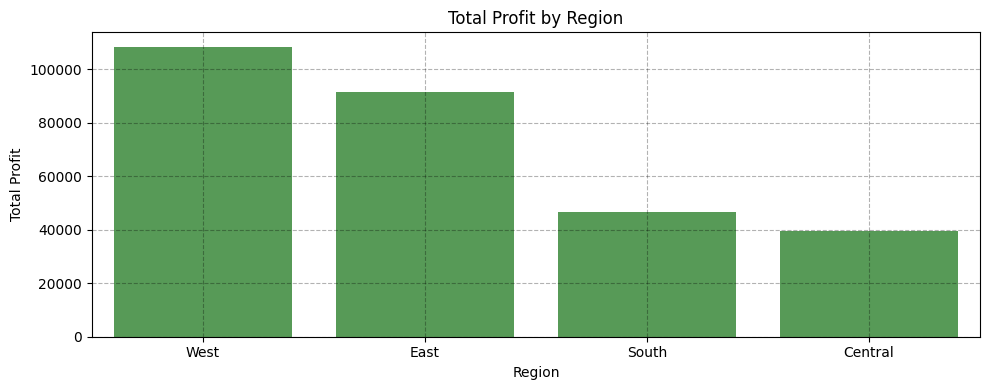

In [99]:
plt.figure(figsize=(10, 4))
sns.barplot(data=region_summary.reset_index(), x="Region", y="Profit", color="green", alpha=0.7)
plt.title("Total Profit by Region")
plt.xlabel("Region")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.grid(linestyle="--", color="black", alpha=0.3)
plt.show()

##### Compare Customers and Profit Together

In [101]:
region_summary_sorted = region_summary.sort_values(by="Unique Customer", ascending=False)
region_summary_sorted

,Unique Customer,Profit,Customer Orders
Region,,,
West,686,108418.45,1611
East,674,91522.78,1401
Central,629,39706.36,1175
South,512,46749.43,822


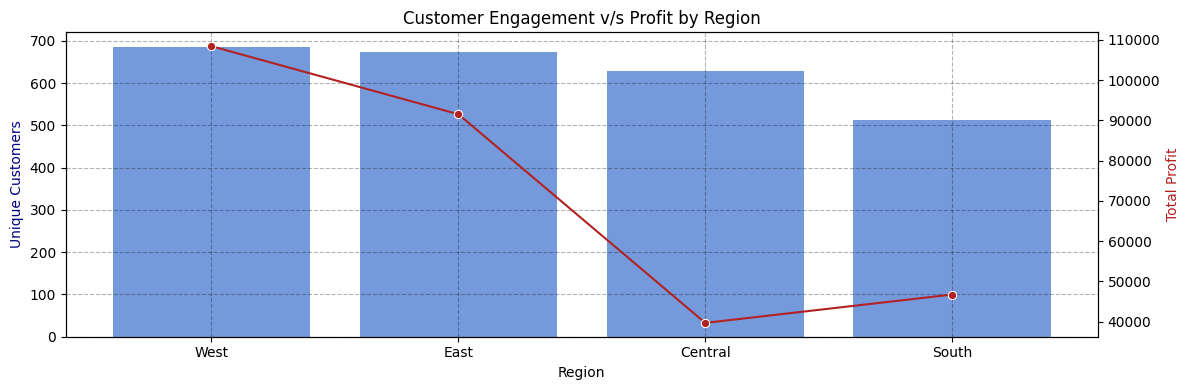

In [104]:
fig, ax1 = plt.subplots(figsize=(12, 4))

sns.barplot(data=region_summary_sorted, x=region_summary_sorted.index, y="Unique Customer", ax=ax1, color="cornflowerblue")
ax1.set_ylabel("Unique Customers", color="navy")
ax1.grid(linestyle="--", color="black", alpha=0.3)

ax2 = ax1.twinx()
sns.lineplot(data=region_summary_sorted, x=region_summary_sorted.index, y="Profit", ax=ax2, marker="o", color="firebrick")
ax2.set_ylabel("Total Profit", color="firebrick")

plt.title("Customer Engagement v/s Profit by Region")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

### Profit Analysis

##### Top 20 Most Profitable Products

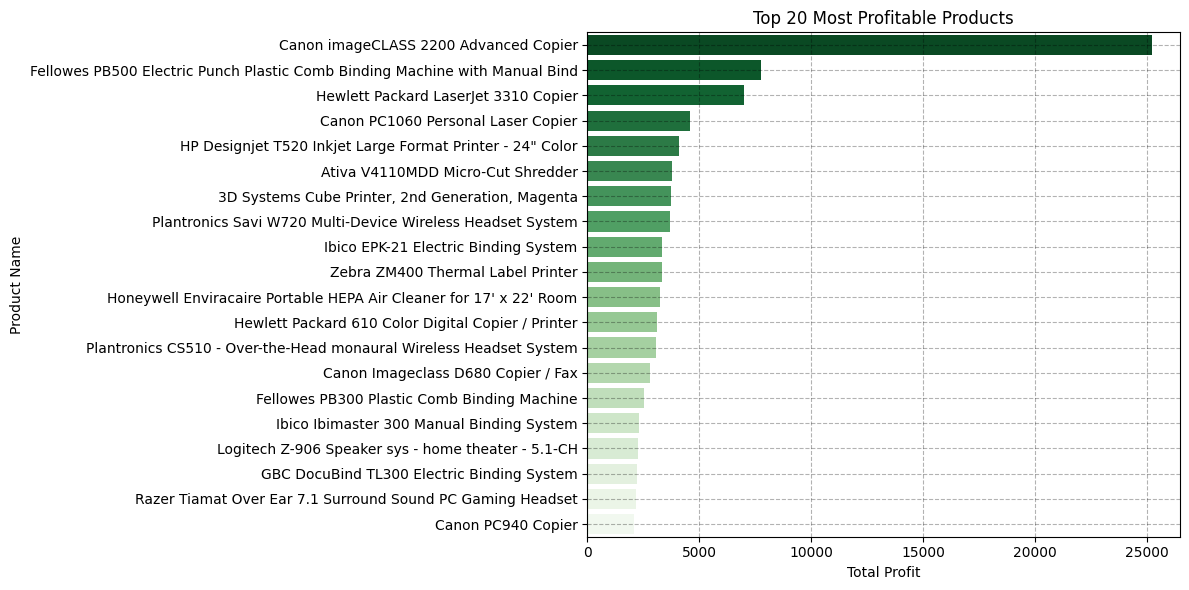

In [113]:
top_products = df.groupby("Product Name")["Profit"].sum().sort_values(ascending=False).head(20).round(2)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="Greens_r")
plt.title("Top 20 Most Profitable Products")
plt.xlabel("Total Profit")
plt.ylabel("Product Name")
plt.tight_layout()
plt.grid(linestyle="--", color="black", alpha=0.3)
plt.show()


##### Top 20 Least Profitable Products 

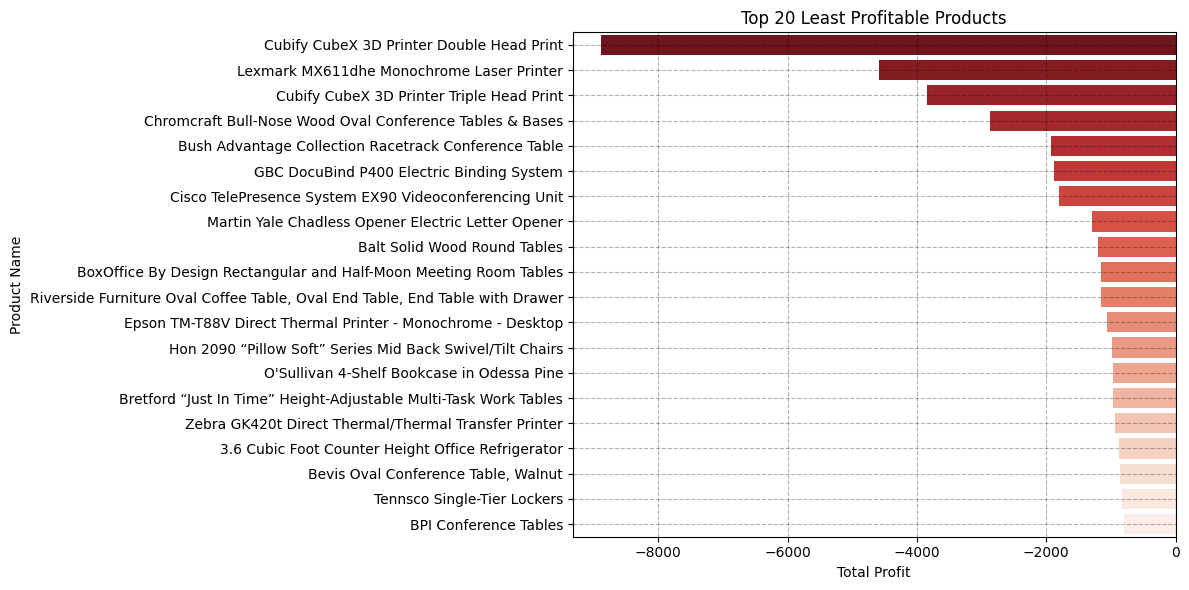

In [118]:
least_products = df.groupby("Product Name")["Profit"].sum().sort_values().head(20).round(2)

plt.figure(figsize=(12, 6))
sns.barplot(x=least_products.values, y=least_products.index, palette="Reds_r")
plt.title("Top 20 Least Profitable Products")
plt.xlabel("Total Profit")
plt.ylabel("Product Name")
plt.tight_layout()
plt.grid(linestyle="--", color="black", alpha=0.3)
plt.show()

##### Top 10 Most Profitable Sub-Category

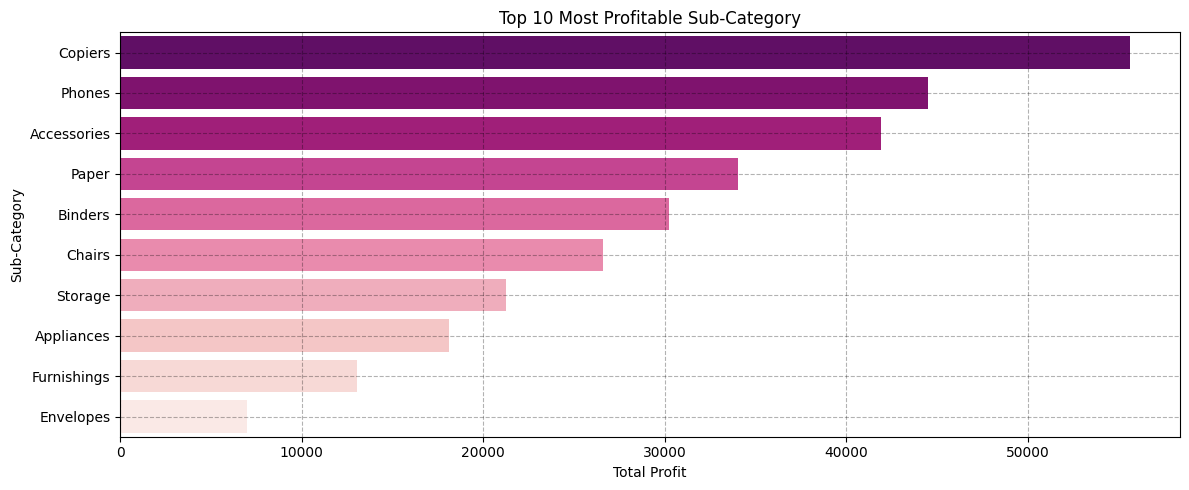

In [143]:
top_subcategory = df.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=False).head(10).round(2)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_subcategory.values, y=top_subcategory.index, palette="RdPu_r")
plt.title("Top 10 Most Profitable Sub-Category")
plt.xlabel("Total Profit")
plt.ylabel("Sub-Category")
plt.tight_layout()
plt.grid(linestyle="--", color="black", alpha=0.3)
plt.show()

##### Top 20 Most Profitable Postal Codes

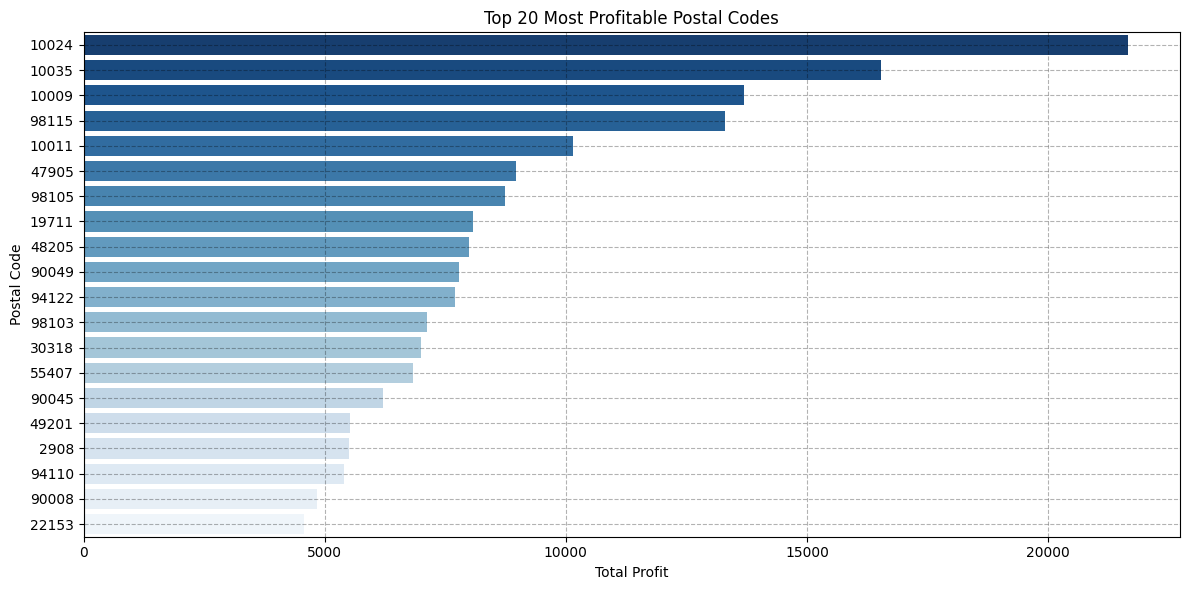

In [120]:
top_postal = df.groupby("Postal Code")["Profit"].sum().sort_values(ascending=False).head(20).round(2)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_postal.values, y=top_postal.index.astype(str), palette="Blues_r")
plt.title("Top 20 Most Profitable Postal Codes")
plt.xlabel("Total Profit")
plt.ylabel("Postal Code")
plt.tight_layout()
plt.grid(linestyle="--", color="black", alpha=0.3)
plt.show()

##### Top 20 Least Profitable Postal Codes 

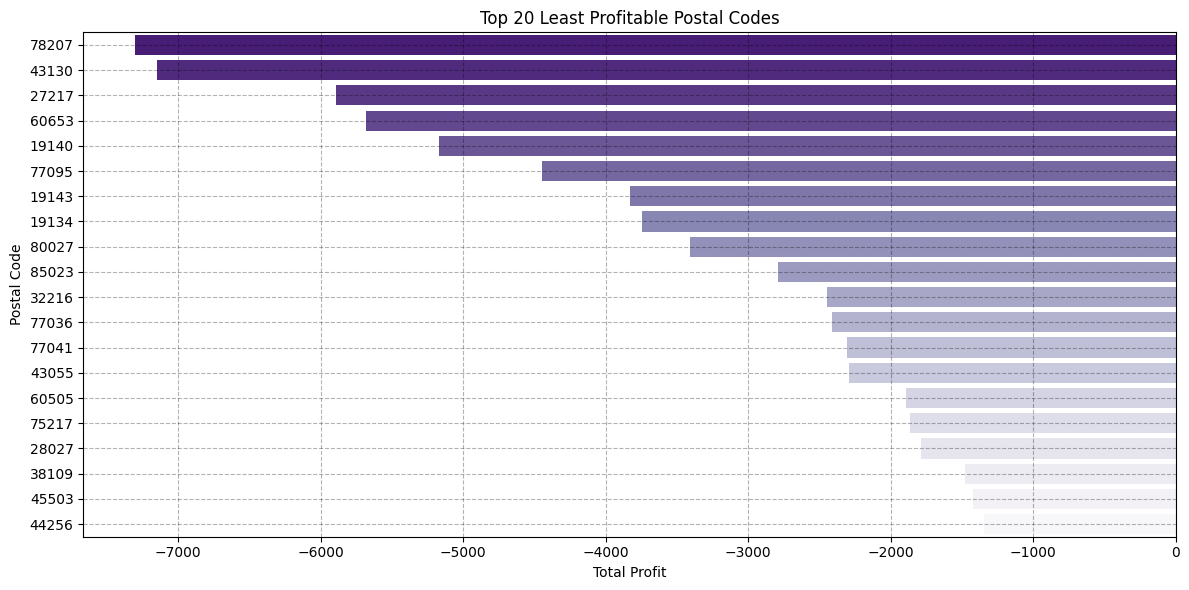

In [121]:
least_postal = df.groupby("Postal Code")["Profit"].sum().sort_values().head(20).round(2)

plt.figure(figsize=(12, 6))
sns.barplot(x=least_postal.values, y=least_postal.index.astype(str), palette="Purples_r")
plt.title("Top 20 Least Profitable Postal Codes")
plt.xlabel("Total Profit")
plt.ylabel("Postal Code")
plt.tight_layout()
plt.grid(linestyle="--", color="black", alpha=0.3)
plt.show()

##### Top 20 Most Profitable State

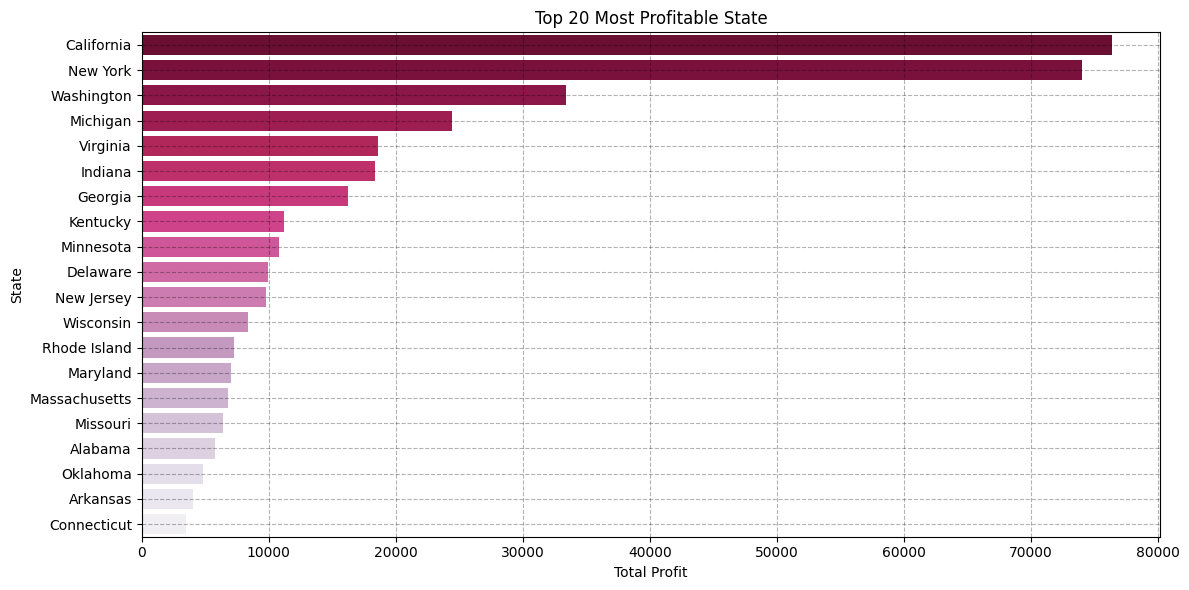

In [129]:
top_state = df.groupby("State")["Profit"].sum().sort_values(ascending=False).head(20).round(2)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_state.values, y=top_state.index, palette="PuRd_r")
plt.title("Top 20 Most Profitable State")
plt.xlabel("Total Profit")
plt.ylabel("State")
plt.tight_layout()
plt.grid(linestyle="--", color="black", alpha=0.3)
plt.show()

##### Top 20 Least Profitable State

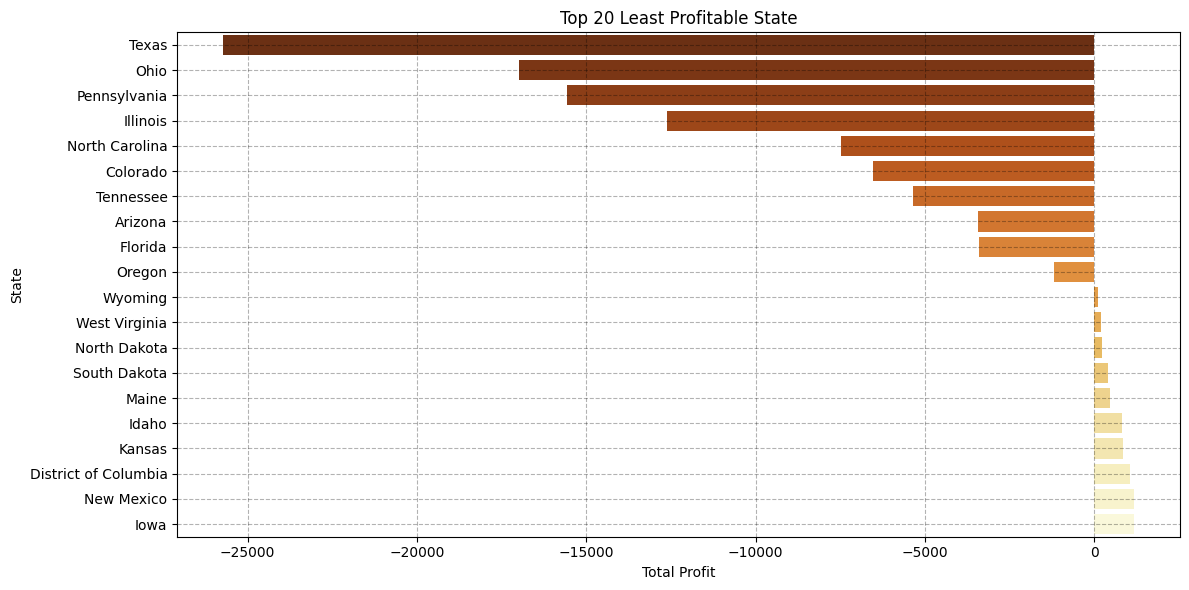

In [139]:
least_state = df.groupby("State")["Profit"].sum().sort_values().head(20).round(2)

plt.figure(figsize=(12, 6))
sns.barplot(x=least_state.values, y=least_state.index, palette="YlOrBr_r")
plt.title("Top 20 Least Profitable State")
plt.xlabel("Total Profit")
plt.ylabel("State")
plt.tight_layout()
plt.grid(linestyle="--", color="black", alpha=0.3)
plt.show()

##### Year-wise Profit Trend Analysis

In [136]:
df["Year"] = df["Order Date"].dt.year

yearly_profit = df.groupby("Year")["Profit"].sum().reset_index().round(2)
yearly_profit["Label"] = yearly_profit["Profit"].apply(lambda x: "Profit" if x > 0 else "Loss")
yearly_profit

,Year,Profit,Label
0,2014,49543.97,Profit
1,2015,61618.60,Profit
2,2016,81795.17,Profit
3,2017,93439.27,Profit


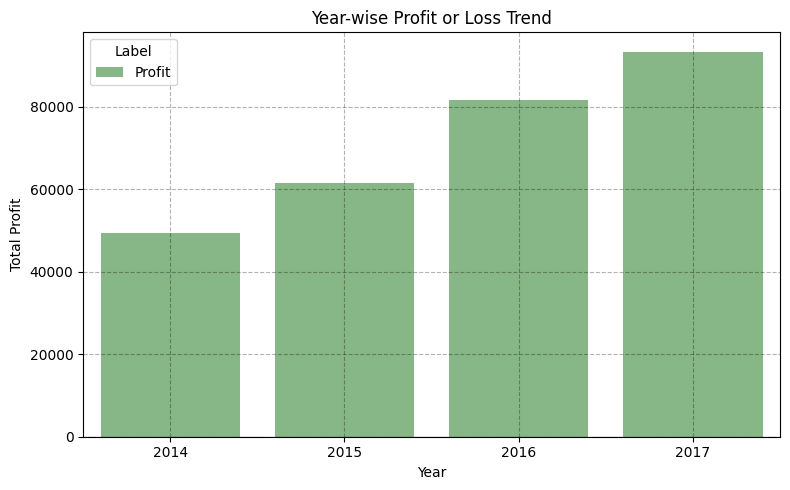

In [138]:
plt.figure(figsize=(8, 5))
sns.barplot(data=yearly_profit, x="Year", y="Profit", hue="Label", palette={"Profit" : "green", "Loss" : "red"}, alpha=0.5)
plt.title("Year-wise Profit or Loss Trend")
plt.xlabel("Year")
plt.ylabel("Total Profit")
plt.axhline(0, color="black", linewidth=0.8)
plt.grid(linestyle="--", color="black", alpha=0.3)
plt.tight_layout()
plt.show()

##### Total Profit and Profit as % of Sales

In [132]:
total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()
profit_percentage = (total_profit / total_sales) * 100

print(f"📦 Total Sales: ${total_sales:,.2f}")
print(f"💰 Total Profit: ${total_profit:,.2f}")
print(f"📊 Profit Percentage: {profit_percentage:.2f}% of sales")

📦 Total Sales: $2,297,200.86
💰 Total Profit: $286,397.02
📊 Profit Percentage: 12.47% of sales
